# CycleGAN train

In [1]:
import os
#D:\\braude\\7th semester\\deep learning\\GDL_code-master_1\\
path0='C:\\Users\\David\\Desktop\\GDL_code-master_1\\'

from os.path import join
import sys
sys.path.append(path0+'\\utils')
sys.path.append(path0+'\\models')
sys.path.append(path0+'\\run')
sys.path.insert(1, path0)
currentDirectory = os.getcwd()
from tensorflow import keras
from callbacks import *
from callbacks import CustomCallback, step_decay_schedule
from AE import Autoencoder

from utils import *
from models import *

import os
import matplotlib.pyplot as plt


from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization

from models.cycleGAN import CycleGAN
from loaders import DataLoader

# keras_contrib.layers.normalization.instancenormalization import !!!!!!!!!!

In [2]:

# run params
SECTION = 'paint'
RUN_ID = '0001'
DATA_NAME = 'horse2zebra'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, 'horse2zebra'])
print(path0+RUN_FOLDER)
#if not 0:
#os.path.exists(path0+RUN_FOLDER):
   # os.mkdir(path0+RUN_FOLDER)
    #os.mkdir(os.path.join(path0+RUN_FOLDER, 'viz'))
    #os.mkdir(os.path.join(path0+RUN_FOLDER, 'images'))
    #os.mkdir(os.path.join(path0+RUN_FOLDER, 'weights'))

mode =  'build' # 'build' # 

C:\Users\David\Desktop\GDL_code-master_1\run/paint/0001_horse2zebra


# data

In [3]:
IMAGE_SIZE = 128

In [4]:

#import torch
#from torch.utils.data import Dataset, DataLoader

from models.cycleGAN import CycleGAN
from loaders import DataLoader
data_loader = DataLoader(dataset_name=DATA_NAME, img_res=(IMAGE_SIZE, IMAGE_SIZE))


# architecture

In [5]:
gan = CycleGAN(
    input_dim = (IMAGE_SIZE,IMAGE_SIZE,3)
    , learning_rate = 0.0002
    , buffer_max_length = 50
    , lambda_validation = 1
    , lambda_reconstr = 10
    , lambda_id = 2
    , generator_type = 'unet'
    , gen_n_filters = 32
    , disc_n_filters = 32
    )
print(RUN_FOLDER)
if mode == 'build':
    gan.save(RUN_FOLDER)
else:
    gan.load_weights(os.path.join(path0+RUN_FOLDER, 'weights/weights.h5'))
    


run/paint/0001_horse2zebra
('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')
('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')
('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')
('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')
('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [6]:
gan.g_BA.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d_18 (Conv2D)              (None, 64, 64, 32)   1568        input_4[0][0]                    
__________________________________________________________________________________________________
instance_normalization_13 (Inst (None, 64, 64, 32)   0           conv2d_18[0][0]                  
__________________________________________________________________________________________________
activation_7 (Activation)       (None, 64, 64, 32)   0           instance_normalization_13[0][0]  
____________________________________________________________________________________________

In [7]:
gan.g_AB.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 64, 64, 32)   1568        input_3[0][0]                    
__________________________________________________________________________________________________
instance_normalization_6 (Insta (None, 64, 64, 32)   0           conv2d_10[0][0]                  
__________________________________________________________________________________________________
activation (Activation)         (None, 64, 64, 32)   0           instance_normalization_6[0][0]   
____________________________________________________________________________________________

In [8]:
gan.d_A.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 32)        1568      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        32832     
_________________________________________________________________
instance_normalization (Inst (None, 32, 32, 64)        0         
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       131200

In [9]:
gan.d_B.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 32)        1568      
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 64)        32832     
_________________________________________________________________
instance_normalization_3 (In (None, 32, 32, 64)        0         
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 128)       1312

# train

In [10]:
BATCH_SIZE = 1
EPOCHS = 7
PRINT_EVERY_N_BATCHES = 10

TEST_A_FILE = 'n02381460_8980.jpg'
TEST_B_FILE = 'n02391049_6890.jpg'

In [11]:

RUN_FOLDER='C:\\Users\\David\\Desktop\\GDL_code-master_1\\data\\horse2zebra'
gan.train(data_loader
        , run_folder = RUN_FOLDER
        , epochs=EPOCHS
        , test_A_file = TEST_A_FILE
        , test_B_file = TEST_B_FILE
        , batch_size=BATCH_SIZE
        , sample_interval=PRINT_EVERY_N_BATCHES)
        

[Epoch 0/7] [Batch 0/1067] [D loss: 1.174837, acc:  44%] [G loss: 16.786808, adv: 2.009275, recon: 1.246445, id: 1.156541] time: 0:00:13.692788 
[Epoch 0/7] [Batch 1/1067] [D loss: 1.118205, acc:  47%] [G loss: 16.377375, adv: 1.490473, recon: 1.240122, id: 1.242843] time: 0:00:15.582828 
[Epoch 0/7] [Batch 2/1067] [D loss: 1.164516, acc:  47%] [G loss: 16.480743, adv: 1.965226, recon: 1.216338, id: 1.176071] time: 0:00:15.789800 
[Epoch 0/7] [Batch 3/1067] [D loss: 0.852378, acc:  51%] [G loss: 15.883472, adv: 1.688945, recon: 1.200718, id: 1.093673] time: 0:00:16.001989 
[Epoch 0/7] [Batch 4/1067] [D loss: 0.982906, acc:  49%] [G loss: 16.138145, adv: 1.507106, recon: 1.202225, id: 1.304393] time: 0:00:16.210270 
[Epoch 0/7] [Batch 5/1067] [D loss: 0.961784, acc:  52%] [G loss: 15.683402, adv: 3.287852, recon: 1.023646, id: 1.079547] time: 0:00:16.423653 
[Epoch 0/7] [Batch 6/1067] [D loss: 1.054172, acc:  50%] [G loss: 13.511215, adv: 1.752501, recon: 0.981937, id: 0.969670] time: 0

[Epoch 0/7] [Batch 53/1067] [D loss: 0.352015, acc:  55%] [G loss: 9.269035, adv: 1.036010, recon: 0.692104, id: 0.655995] time: 0:00:35.337319 
[Epoch 0/7] [Batch 54/1067] [D loss: 0.275655, acc:  70%] [G loss: 9.148125, adv: 1.249534, recon: 0.658327, id: 0.657661] time: 0:00:35.548637 
[Epoch 0/7] [Batch 55/1067] [D loss: 0.416474, acc:  49%] [G loss: 9.444576, adv: 0.821499, recon: 0.727142, id: 0.675827] time: 0:00:35.757312 
[Epoch 0/7] [Batch 56/1067] [D loss: 0.342997, acc:  54%] [G loss: 9.524799, adv: 0.930650, recon: 0.720999, id: 0.692078] time: 0:00:35.964762 
[Epoch 0/7] [Batch 57/1067] [D loss: 0.385207, acc:  53%] [G loss: 7.821962, adv: 0.985228, recon: 0.573455, id: 0.551092] time: 0:00:36.172943 
[Epoch 0/7] [Batch 58/1067] [D loss: 0.308022, acc:  62%] [G loss: 6.992785, adv: 0.881417, recon: 0.508625, id: 0.512557] time: 0:00:36.383385 
[Epoch 0/7] [Batch 59/1067] [D loss: 0.358522, acc:  52%] [G loss: 8.707875, adv: 0.950210, recon: 0.640709, id: 0.675289] time: 0

[Epoch 0/7] [Batch 111/1067] [D loss: 0.234833, acc:  63%] [G loss: 7.339202, adv: 0.610357, recon: 0.557670, id: 0.576074] time: 0:00:58.477788 
[Epoch 0/7] [Batch 112/1067] [D loss: 0.285880, acc:  55%] [G loss: 7.992512, adv: 0.809618, recon: 0.597426, id: 0.604317] time: 0:00:58.693223 
[Epoch 0/7] [Batch 113/1067] [D loss: 0.279359, acc:  54%] [G loss: 6.881485, adv: 0.407249, recon: 0.539428, id: 0.539978] time: 0:00:58.905152 
[Epoch 0/7] [Batch 114/1067] [D loss: 0.219648, acc:  69%] [G loss: 7.328994, adv: 0.855406, recon: 0.540100, id: 0.536296] time: 0:00:59.120828 
[Epoch 0/7] [Batch 115/1067] [D loss: 0.303512, acc:  52%] [G loss: 6.006332, adv: 0.717382, recon: 0.440237, id: 0.443291] time: 0:00:59.330770 
[Epoch 0/7] [Batch 116/1067] [D loss: 0.170067, acc:  78%] [G loss: 8.484232, adv: 1.184463, recon: 0.606996, id: 0.614903] time: 0:00:59.539292 
[Epoch 0/7] [Batch 117/1067] [D loss: 0.265696, acc:  58%] [G loss: 6.527227, adv: 0.747666, recon: 0.482977, id: 0.474898] 

[Epoch 0/7] [Batch 168/1067] [D loss: 0.174319, acc:  75%] [G loss: 7.620203, adv: 0.960676, recon: 0.559934, id: 0.530093] time: 0:01:19.723904 
[Epoch 0/7] [Batch 169/1067] [D loss: 0.228210, acc:  66%] [G loss: 6.164544, adv: 0.650635, recon: 0.455548, id: 0.479214] time: 0:01:19.936255 
[Epoch 0/7] [Batch 170/1067] [D loss: 0.224992, acc:  63%] [G loss: 6.126258, adv: 0.420572, recon: 0.481052, id: 0.447584] time: 0:01:20.147704 
[Epoch 0/7] [Batch 171/1067] [D loss: 0.361442, acc:  48%] [G loss: 7.203357, adv: 0.771652, recon: 0.542781, id: 0.501946] time: 0:01:22.131473 
[Epoch 0/7] [Batch 172/1067] [D loss: 0.193453, acc:  70%] [G loss: 6.777443, adv: 0.828102, recon: 0.495838, id: 0.495483] time: 0:01:22.341749 
[Epoch 0/7] [Batch 173/1067] [D loss: 0.249579, acc:  59%] [G loss: 7.863028, adv: 0.671997, recon: 0.605933, id: 0.565851] time: 0:01:22.570138 
[Epoch 0/7] [Batch 174/1067] [D loss: 0.286043, acc:  59%] [G loss: 8.417570, adv: 0.921757, recon: 0.627108, id: 0.612368] 

[Epoch 0/7] [Batch 225/1067] [D loss: 0.263648, acc:  55%] [G loss: 6.816174, adv: 0.481462, recon: 0.532463, id: 0.505039] time: 0:01:43.007544 
[Epoch 0/7] [Batch 226/1067] [D loss: 0.327337, acc:  54%] [G loss: 6.846787, adv: 0.408334, recon: 0.538609, id: 0.526183] time: 0:01:43.225972 
[Epoch 0/7] [Batch 227/1067] [D loss: 0.275868, acc:  57%] [G loss: 6.320006, adv: 0.678523, recon: 0.471993, id: 0.460777] time: 0:01:43.443202 
[Epoch 0/7] [Batch 228/1067] [D loss: 0.123359, acc:  86%] [G loss: 7.353782, adv: 0.804252, recon: 0.543521, id: 0.557159] time: 0:01:43.666314 
[Epoch 0/7] [Batch 229/1067] [D loss: 0.185540, acc:  72%] [G loss: 6.894500, adv: 0.723722, recon: 0.521875, id: 0.476016] time: 0:01:43.877698 
[Epoch 0/7] [Batch 230/1067] [D loss: 0.229888, acc:  67%] [G loss: 5.628832, adv: 0.863677, recon: 0.398346, id: 0.390845] time: 0:01:44.092866 
[Epoch 0/7] [Batch 231/1067] [D loss: 0.273223, acc:  56%] [G loss: 5.693725, adv: 0.597411, recon: 0.426759, id: 0.414362] 

[Epoch 0/7] [Batch 282/1067] [D loss: 0.291465, acc:  52%] [G loss: 4.685674, adv: 0.269959, recon: 0.369542, id: 0.360147] time: 0:02:06.170250 
[Epoch 0/7] [Batch 283/1067] [D loss: 0.428384, acc:  48%] [G loss: 7.178768, adv: 0.765935, recon: 0.535128, id: 0.530776] time: 0:02:06.379751 
[Epoch 0/7] [Batch 284/1067] [D loss: 0.208058, acc:  69%] [G loss: 7.173723, adv: 0.941839, recon: 0.522437, id: 0.503758] time: 0:02:06.591623 
[Epoch 0/7] [Batch 285/1067] [D loss: 0.288643, acc:  58%] [G loss: 7.076725, adv: 0.791051, recon: 0.531966, id: 0.483007] time: 0:02:06.803130 
[Epoch 0/7] [Batch 286/1067] [D loss: 0.204574, acc:  69%] [G loss: 5.974571, adv: 0.937837, recon: 0.425758, id: 0.389575] time: 0:02:07.013567 
[Epoch 0/7] [Batch 287/1067] [D loss: 0.219998, acc:  63%] [G loss: 5.660055, adv: 0.564723, recon: 0.427898, id: 0.408174] time: 0:02:07.222010 
[Epoch 0/7] [Batch 288/1067] [D loss: 0.252812, acc:  58%] [G loss: 4.395099, adv: 0.562729, recon: 0.319901, id: 0.316680] 

[Epoch 0/7] [Batch 339/1067] [D loss: 0.110581, acc:  88%] [G loss: 6.252691, adv: 0.769203, recon: 0.457351, id: 0.454991] time: 0:02:27.197816 
[Epoch 0/7] [Batch 340/1067] [D loss: 0.259110, acc:  58%] [G loss: 5.903373, adv: 0.789828, recon: 0.427335, id: 0.420097] time: 0:02:27.938673 
[Epoch 0/7] [Batch 341/1067] [D loss: 0.211185, acc:  68%] [G loss: 8.213133, adv: 0.588587, recon: 0.637601, id: 0.624267] time: 0:02:29.916230 
[Epoch 0/7] [Batch 342/1067] [D loss: 0.218367, acc:  66%] [G loss: 6.255868, adv: 0.813526, recon: 0.459194, id: 0.425200] time: 0:02:30.125315 
[Epoch 0/7] [Batch 343/1067] [D loss: 0.291882, acc:  52%] [G loss: 8.869671, adv: 0.424546, recon: 0.705759, id: 0.693768] time: 0:02:30.337596 
[Epoch 0/7] [Batch 344/1067] [D loss: 0.252267, acc:  59%] [G loss: 4.618556, adv: 0.319803, recon: 0.366920, id: 0.314777] time: 0:02:30.548668 
[Epoch 0/7] [Batch 345/1067] [D loss: 0.162301, acc:  77%] [G loss: 5.662996, adv: 0.286160, recon: 0.451138, id: 0.432730] 

[Epoch 0/7] [Batch 396/1067] [D loss: 0.332801, acc:  61%] [G loss: 5.456294, adv: 0.587881, recon: 0.411105, id: 0.378682] time: 0:02:50.500913 
[Epoch 0/7] [Batch 397/1067] [D loss: 0.132225, acc:  86%] [G loss: 6.742839, adv: 0.906292, recon: 0.490482, id: 0.465865] time: 0:02:50.710339 
[Epoch 0/7] [Batch 398/1067] [D loss: 0.239851, acc:  66%] [G loss: 8.430990, adv: 0.932860, recon: 0.627450, id: 0.611813] time: 0:02:50.928748 
[Epoch 0/7] [Batch 399/1067] [D loss: 0.152617, acc:  77%] [G loss: 6.814706, adv: 0.835961, recon: 0.504083, id: 0.468956] time: 0:02:51.140360 
[Epoch 0/7] [Batch 400/1067] [D loss: 0.299237, acc:  51%] [G loss: 5.744933, adv: 0.318962, recon: 0.453545, id: 0.445262] time: 0:02:51.348316 
[Epoch 0/7] [Batch 401/1067] [D loss: 0.238836, acc:  61%] [G loss: 8.771628, adv: 0.510938, recon: 0.685314, id: 0.703777] time: 0:02:53.355680 
[Epoch 0/7] [Batch 402/1067] [D loss: 0.233921, acc:  62%] [G loss: 5.555634, adv: 0.336035, recon: 0.439656, id: 0.411522] 

[Epoch 0/7] [Batch 453/1067] [D loss: 0.104957, acc:  92%] [G loss: 5.021370, adv: 0.413369, recon: 0.385817, id: 0.374916] time: 0:03:13.940120 
[Epoch 0/7] [Batch 454/1067] [D loss: 0.348676, acc:  46%] [G loss: 5.662783, adv: 0.708258, recon: 0.417143, id: 0.391546] time: 0:03:14.157347 
[Epoch 0/7] [Batch 455/1067] [D loss: 0.261943, acc:  63%] [G loss: 5.413847, adv: 0.227196, recon: 0.431579, id: 0.435433] time: 0:03:14.367330 
[Epoch 0/7] [Batch 456/1067] [D loss: 0.248778, acc:  62%] [G loss: 5.237545, adv: 0.336685, recon: 0.406786, id: 0.416501] time: 0:03:14.574753 
[Epoch 0/7] [Batch 457/1067] [D loss: 0.266477, acc:  55%] [G loss: 5.113766, adv: 0.277297, recon: 0.403806, id: 0.399203] time: 0:03:14.787351 
[Epoch 0/7] [Batch 458/1067] [D loss: 0.155931, acc:  78%] [G loss: 6.461184, adv: 0.292959, recon: 0.525750, id: 0.455364] time: 0:03:14.996342 
[Epoch 0/7] [Batch 459/1067] [D loss: 0.141203, acc:  83%] [G loss: 5.155442, adv: 0.162811, recon: 0.415782, id: 0.417407] 

[Epoch 0/7] [Batch 510/1067] [D loss: 0.107343, acc:  84%] [G loss: 6.195870, adv: 0.905444, recon: 0.444949, id: 0.420470] time: 0:03:35.113556 
[Epoch 0/7] [Batch 511/1067] [D loss: 0.103827, acc:  93%] [G loss: 6.405966, adv: 0.584007, recon: 0.487902, id: 0.471469] time: 0:03:37.141705 
[Epoch 0/7] [Batch 512/1067] [D loss: 0.395933, acc:  44%] [G loss: 7.228352, adv: 0.330469, recon: 0.576704, id: 0.565421] time: 0:03:37.358884 
[Epoch 0/7] [Batch 513/1067] [D loss: 0.083904, acc:  91%] [G loss: 5.531962, adv: 0.554646, recon: 0.415641, id: 0.410453] time: 0:03:37.585271 
[Epoch 0/7] [Batch 514/1067] [D loss: 0.198591, acc:  72%] [G loss: 7.484627, adv: 0.481091, recon: 0.582819, id: 0.587672] time: 0:03:37.796743 
[Epoch 0/7] [Batch 515/1067] [D loss: 0.146841, acc:  77%] [G loss: 5.393623, adv: 0.663389, recon: 0.400779, id: 0.361222] time: 0:03:38.009406 
[Epoch 0/7] [Batch 516/1067] [D loss: 0.280244, acc:  61%] [G loss: 4.734316, adv: 0.376311, recon: 0.364055, id: 0.358725] 

[Epoch 0/7] [Batch 568/1067] [D loss: 0.197488, acc:  69%] [G loss: 5.100773, adv: 0.124073, recon: 0.412191, id: 0.427395] time: 0:03:58.987644 
[Epoch 0/7] [Batch 569/1067] [D loss: 0.210479, acc:  65%] [G loss: 8.369330, adv: 0.579836, recon: 0.648376, id: 0.652866] time: 0:03:59.195589 
[Epoch 0/7] [Batch 570/1067] [D loss: 0.130526, acc:  85%] [G loss: 3.996233, adv: 0.420296, recon: 0.292404, id: 0.325947] time: 0:03:59.405066 
[Epoch 0/7] [Batch 571/1067] [D loss: 0.361484, acc:  45%] [G loss: 7.242997, adv: 0.501855, recon: 0.555213, id: 0.594504] time: 0:04:01.403452 
[Epoch 0/7] [Batch 572/1067] [D loss: 0.260476, acc:  62%] [G loss: 5.220134, adv: 0.696672, recon: 0.372969, id: 0.396886] time: 0:04:01.614894 
[Epoch 0/7] [Batch 573/1067] [D loss: 0.213966, acc:  59%] [G loss: 4.569033, adv: 0.215603, recon: 0.362723, id: 0.363099] time: 0:04:01.827134 
[Epoch 0/7] [Batch 574/1067] [D loss: 0.124496, acc:  86%] [G loss: 5.175270, adv: 0.318223, recon: 0.407255, id: 0.392249] 

[Epoch 0/7] [Batch 625/1067] [D loss: 0.205863, acc:  66%] [G loss: 7.945728, adv: 1.392258, recon: 0.554539, id: 0.504041] time: 0:04:22.148829 
[Epoch 0/7] [Batch 626/1067] [D loss: 0.235463, acc:  59%] [G loss: 7.868560, adv: 0.993083, recon: 0.573284, id: 0.571317] time: 0:04:22.367233 
[Epoch 0/7] [Batch 627/1067] [D loss: 0.328057, acc:  49%] [G loss: 4.992454, adv: 0.219274, recon: 0.399509, id: 0.389045] time: 0:04:22.588641 
[Epoch 0/7] [Batch 628/1067] [D loss: 0.295857, acc:  65%] [G loss: 6.770136, adv: 0.354295, recon: 0.538146, id: 0.517188] time: 0:04:22.805412 
[Epoch 0/7] [Batch 629/1067] [D loss: 0.134761, acc:  84%] [G loss: 5.256645, adv: 0.646028, recon: 0.387990, id: 0.365359] time: 0:04:23.033801 
[Epoch 0/7] [Batch 630/1067] [D loss: 0.272953, acc:  54%] [G loss: 5.935517, adv: 1.005989, recon: 0.418268, id: 0.373425] time: 0:04:23.256207 
[Epoch 0/7] [Batch 631/1067] [D loss: 0.150245, acc:  77%] [G loss: 8.852377, adv: 0.609671, recon: 0.685596, id: 0.693374] 

[Epoch 0/7] [Batch 683/1067] [D loss: 0.433434, acc:  65%] [G loss: 4.952878, adv: 0.352213, recon: 0.386454, id: 0.368063] time: 0:04:46.606828 
[Epoch 0/7] [Batch 684/1067] [D loss: 0.358660, acc:  54%] [G loss: 5.054567, adv: 0.288116, recon: 0.400765, id: 0.379401] time: 0:04:46.817265 
[Epoch 0/7] [Batch 685/1067] [D loss: 0.155794, acc:  74%] [G loss: 5.266564, adv: 0.513595, recon: 0.401557, id: 0.368699] time: 0:04:47.032689 
[Epoch 0/7] [Batch 686/1067] [D loss: 0.127538, acc:  84%] [G loss: 5.492376, adv: 0.353734, recon: 0.433628, id: 0.401181] time: 0:04:47.241987 
[Epoch 0/7] [Batch 687/1067] [D loss: 0.091739, acc:  90%] [G loss: 5.427385, adv: 0.522590, recon: 0.413831, id: 0.383243] time: 0:04:47.492691 
[Epoch 0/7] [Batch 688/1067] [D loss: 0.121645, acc:  88%] [G loss: 4.781546, adv: 0.230870, recon: 0.386077, id: 0.344954] time: 0:04:47.895336 
[Epoch 0/7] [Batch 689/1067] [D loss: 0.402214, acc:  36%] [G loss: 5.564811, adv: 0.403901, recon: 0.434806, id: 0.406424] 

[Epoch 0/7] [Batch 740/1067] [D loss: 0.090692, acc:  88%] [G loss: 8.983489, adv: 0.372416, recon: 0.714897, id: 0.731052] time: 0:05:08.463675 
[Epoch 0/7] [Batch 741/1067] [D loss: 0.223894, acc:  73%] [G loss: 6.586027, adv: 0.660936, recon: 0.503241, id: 0.446339] time: 0:05:10.493815 
[Epoch 0/7] [Batch 742/1067] [D loss: 0.129416, acc:  85%] [G loss: 6.570788, adv: 0.213280, recon: 0.530670, id: 0.525404] time: 0:05:10.717914 
[Epoch 0/7] [Batch 743/1067] [D loss: 0.333273, acc:  66%] [G loss: 4.774099, adv: 0.331784, recon: 0.373554, id: 0.353387] time: 0:05:10.944309 
[Epoch 0/7] [Batch 744/1067] [D loss: 0.103196, acc:  92%] [G loss: 6.498099, adv: 0.553649, recon: 0.498612, id: 0.479166] time: 0:05:11.161727 
[Epoch 0/7] [Batch 745/1067] [D loss: 0.263744, acc:  69%] [G loss: 3.980711, adv: 0.070350, recon: 0.325725, id: 0.326556] time: 0:05:11.381176 
[Epoch 0/7] [Batch 746/1067] [D loss: 0.143639, acc:  79%] [G loss: 4.739226, adv: 0.302958, recon: 0.376297, id: 0.336648] 

[Epoch 0/7] [Batch 797/1067] [D loss: 0.093711, acc:  92%] [G loss: 4.616005, adv: 0.331392, recon: 0.360870, id: 0.337954] time: 0:05:31.602368 
[Epoch 0/7] [Batch 798/1067] [D loss: 0.102904, acc:  91%] [G loss: 7.484846, adv: 0.625659, recon: 0.572588, id: 0.566655] time: 0:05:31.816796 
[Epoch 0/7] [Batch 799/1067] [D loss: 0.165031, acc:  75%] [G loss: 6.424318, adv: 0.816876, recon: 0.471673, id: 0.445357] time: 0:05:32.027371 
[Epoch 0/7] [Batch 800/1067] [D loss: 0.230237, acc:  69%] [G loss: 5.153680, adv: 0.219852, recon: 0.413120, id: 0.401312] time: 0:05:32.240409 
[Epoch 0/7] [Batch 801/1067] [D loss: 0.171134, acc:  75%] [G loss: 6.038420, adv: 0.863754, recon: 0.433654, id: 0.419062] time: 0:05:34.292743 
[Epoch 0/7] [Batch 802/1067] [D loss: 0.275027, acc:  50%] [G loss: 6.726713, adv: 1.593162, recon: 0.429949, id: 0.417031] time: 0:05:34.509100 
[Epoch 0/7] [Batch 803/1067] [D loss: 0.183511, acc:  73%] [G loss: 6.092698, adv: 0.564288, recon: 0.461188, id: 0.458263] 

[Epoch 0/7] [Batch 854/1067] [D loss: 0.081925, acc:  91%] [G loss: 5.182447, adv: 0.322802, recon: 0.403902, id: 0.410312] time: 0:05:55.938759 
[Epoch 0/7] [Batch 855/1067] [D loss: 0.177432, acc:  76%] [G loss: 6.554965, adv: 0.153477, recon: 0.529856, id: 0.551464] time: 0:05:56.153277 
[Epoch 0/7] [Batch 856/1067] [D loss: 0.265590, acc:  47%] [G loss: 8.814671, adv: 0.978945, recon: 0.659096, id: 0.622385] time: 0:05:56.366647 
[Epoch 0/7] [Batch 857/1067] [D loss: 0.104195, acc:  91%] [G loss: 6.322960, adv: 1.017292, recon: 0.440992, id: 0.447874] time: 0:05:56.580292 
[Epoch 0/7] [Batch 858/1067] [D loss: 0.244481, acc:  60%] [G loss: 5.406768, adv: 0.263951, recon: 0.438533, id: 0.378744] time: 0:05:56.792724 
[Epoch 0/7] [Batch 859/1067] [D loss: 0.082906, acc:  94%] [G loss: 5.935271, adv: 0.506051, recon: 0.455753, id: 0.435846] time: 0:05:57.002093 
[Epoch 0/7] [Batch 860/1067] [D loss: 0.076038, acc:  92%] [G loss: 5.430714, adv: 0.217268, recon: 0.429622, id: 0.458614] 

[Epoch 0/7] [Batch 911/1067] [D loss: 0.178120, acc:  75%] [G loss: 6.374309, adv: 0.683782, recon: 0.478800, id: 0.451265] time: 0:06:18.985938 
[Epoch 0/7] [Batch 912/1067] [D loss: 0.139043, acc:  80%] [G loss: 5.888637, adv: 0.758059, recon: 0.426142, id: 0.434581] time: 0:06:19.200033 
[Epoch 0/7] [Batch 913/1067] [D loss: 0.160567, acc:  78%] [G loss: 6.348232, adv: 0.902038, recon: 0.454145, id: 0.452373] time: 0:06:19.414459 
[Epoch 0/7] [Batch 914/1067] [D loss: 0.226487, acc:  59%] [G loss: 7.900361, adv: 0.381262, recon: 0.628594, id: 0.616582] time: 0:06:19.627497 
[Epoch 0/7] [Batch 915/1067] [D loss: 0.083026, acc:  93%] [G loss: 8.393291, adv: 1.008664, recon: 0.609502, id: 0.644805] time: 0:06:19.847913 
[Epoch 0/7] [Batch 916/1067] [D loss: 0.074354, acc:  96%] [G loss: 5.103331, adv: 0.605168, recon: 0.375679, id: 0.370688] time: 0:06:20.063613 
[Epoch 0/7] [Batch 917/1067] [D loss: 0.142747, acc:  81%] [G loss: 6.314699, adv: 0.819953, recon: 0.460195, id: 0.446397] 

[Epoch 0/7] [Batch 968/1067] [D loss: 0.141323, acc:  84%] [G loss: 7.518666, adv: 0.410557, recon: 0.595502, id: 0.576542] time: 0:06:40.386336 
[Epoch 0/7] [Batch 969/1067] [D loss: 0.150252, acc:  83%] [G loss: 5.181943, adv: 0.504978, recon: 0.387015, id: 0.403409] time: 0:06:40.607717 
[Epoch 0/7] [Batch 970/1067] [D loss: 0.048486, acc:  99%] [G loss: 5.655591, adv: 0.560958, recon: 0.416268, id: 0.465975] time: 0:06:40.824667 
[Epoch 0/7] [Batch 971/1067] [D loss: 0.099098, acc:  91%] [G loss: 5.723222, adv: 0.376565, recon: 0.452438, id: 0.411139] time: 0:06:42.874117 
[Epoch 0/7] [Batch 972/1067] [D loss: 0.070699, acc:  97%] [G loss: 5.846183, adv: 0.305575, recon: 0.471341, id: 0.413601] time: 0:06:43.089410 
[Epoch 0/7] [Batch 973/1067] [D loss: 0.045197, acc:  97%] [G loss: 5.326143, adv: 0.056745, recon: 0.440004, id: 0.434680] time: 0:06:43.304236 
[Epoch 0/7] [Batch 974/1067] [D loss: 0.040900, acc:  98%] [G loss: 4.812606, adv: 0.341670, recon: 0.376439, id: 0.353272] 

[Epoch 0/7] [Batch 1024/1067] [D loss: 0.211559, acc:  74%] [G loss: 5.564474, adv: 0.317186, recon: 0.438637, id: 0.430459] time: 0:07:04.534260 
[Epoch 0/7] [Batch 1025/1067] [D loss: 0.488476, acc:  49%] [G loss: 6.740116, adv: 0.593565, recon: 0.511868, id: 0.513934] time: 0:07:04.753079 
[Epoch 0/7] [Batch 1026/1067] [D loss: 0.212579, acc:  67%] [G loss: 7.750899, adv: 1.044621, recon: 0.561940, id: 0.543440] time: 0:07:04.964748 
[Epoch 0/7] [Batch 1027/1067] [D loss: 0.214205, acc:  81%] [G loss: 8.693658, adv: 0.624410, recon: 0.679367, id: 0.637789] time: 0:07:05.180765 
[Epoch 0/7] [Batch 1028/1067] [D loss: 0.232108, acc:  66%] [G loss: 6.093606, adv: 0.417579, recon: 0.476489, id: 0.455570] time: 0:07:05.397881 
[Epoch 0/7] [Batch 1029/1067] [D loss: 0.220819, acc:  61%] [G loss: 5.703212, adv: 0.148243, recon: 0.463735, id: 0.458808] time: 0:07:05.616316 
[Epoch 0/7] [Batch 1030/1067] [D loss: 0.166165, acc:  78%] [G loss: 5.491877, adv: 0.301528, recon: 0.440734, id: 0.3

[Epoch 1/7] [Batch 14/1067] [D loss: 0.126992, acc:  81%] [G loss: 3.850183, adv: 0.587533, recon: 0.275964, id: 0.251505] time: 0:07:27.450980 
[Epoch 1/7] [Batch 15/1067] [D loss: 0.037043, acc:  99%] [G loss: 4.004787, adv: 0.701728, recon: 0.278640, id: 0.258331] time: 0:07:27.661673 
[Epoch 1/7] [Batch 16/1067] [D loss: 0.062953, acc:  98%] [G loss: 4.631009, adv: 0.963146, recon: 0.307947, id: 0.294198] time: 0:07:27.883080 
[Epoch 1/7] [Batch 17/1067] [D loss: 0.163105, acc:  78%] [G loss: 6.680864, adv: 0.635519, recon: 0.503629, id: 0.504528] time: 0:07:28.096579 
[Epoch 1/7] [Batch 18/1067] [D loss: 0.136410, acc:  77%] [G loss: 4.238417, adv: 0.852218, recon: 0.281059, id: 0.287805] time: 0:07:28.315263 
[Epoch 1/7] [Batch 19/1067] [D loss: 0.137187, acc:  78%] [G loss: 6.882873, adv: 0.212595, recon: 0.556446, id: 0.552907] time: 0:07:28.524630 
[Epoch 1/7] [Batch 20/1067] [D loss: 0.137597, acc:  83%] [G loss: 6.356165, adv: 0.333695, recon: 0.503909, id: 0.491691] time: 0

[Epoch 1/7] [Batch 71/1067] [D loss: 0.276467, acc:  53%] [G loss: 9.529732, adv: 0.064033, recon: 0.788235, id: 0.791675] time: 0:07:50.505715 
[Epoch 1/7] [Batch 72/1067] [D loss: 0.049991, acc:  98%] [G loss: 9.937016, adv: 0.343420, recon: 0.799687, id: 0.798363] time: 0:07:50.725098 
[Epoch 1/7] [Batch 73/1067] [D loss: 0.092607, acc:  89%] [G loss: 5.710226, adv: 0.443975, recon: 0.442357, id: 0.421342] time: 0:07:50.946525 
[Epoch 1/7] [Batch 74/1067] [D loss: 0.147488, acc:  77%] [G loss: 6.101449, adv: 0.215569, recon: 0.494571, id: 0.470087] time: 0:07:51.172901 
[Epoch 1/7] [Batch 75/1067] [D loss: 0.111719, acc:  87%] [G loss: 9.051825, adv: 0.764815, recon: 0.694840, id: 0.669304] time: 0:07:51.382797 
[Epoch 1/7] [Batch 76/1067] [D loss: 0.237963, acc:  59%] [G loss: 6.283136, adv: 0.607913, recon: 0.472415, id: 0.475538] time: 0:07:51.594248 
[Epoch 1/7] [Batch 77/1067] [D loss: 0.210200, acc:  76%] [G loss: 6.210678, adv: 0.752794, recon: 0.466625, id: 0.395816] time: 0

[Epoch 1/7] [Batch 128/1067] [D loss: 0.243700, acc:  73%] [G loss: 4.808037, adv: 0.792818, recon: 0.336188, id: 0.326672] time: 0:08:13.291206 
[Epoch 1/7] [Batch 129/1067] [D loss: 0.337384, acc:  60%] [G loss: 7.393370, adv: 0.828923, recon: 0.557860, id: 0.492923] time: 0:08:13.507684 
[Epoch 1/7] [Batch 130/1067] [D loss: 0.175539, acc:  71%] [G loss: 5.769236, adv: 0.666614, recon: 0.430247, id: 0.400078] time: 0:08:13.727040 
[Epoch 1/7] [Batch 131/1067] [D loss: 0.135294, acc:  85%] [G loss: 4.360607, adv: 0.402145, recon: 0.331139, id: 0.323538] time: 0:08:15.767520 
[Epoch 1/7] [Batch 132/1067] [D loss: 0.244987, acc:  70%] [G loss: 5.948852, adv: 0.456570, recon: 0.458277, id: 0.454755] time: 0:08:15.981709 
[Epoch 1/7] [Batch 133/1067] [D loss: 0.260445, acc:  59%] [G loss: 4.502653, adv: 0.458272, recon: 0.338350, id: 0.330440] time: 0:08:16.195495 
[Epoch 1/7] [Batch 134/1067] [D loss: 0.150975, acc:  79%] [G loss: 6.008529, adv: 0.523741, recon: 0.460277, id: 0.441011] 

[Epoch 1/7] [Batch 186/1067] [D loss: 0.270166, acc:  59%] [G loss: 9.782408, adv: 1.045961, recon: 0.725598, id: 0.740232] time: 0:08:36.711399 
[Epoch 1/7] [Batch 187/1067] [D loss: 0.249256, acc:  68%] [G loss: 5.272684, adv: 0.531594, recon: 0.393891, id: 0.401089] time: 0:08:36.927408 
[Epoch 1/7] [Batch 188/1067] [D loss: 0.253731, acc:  56%] [G loss: 6.822781, adv: 0.493568, recon: 0.525894, id: 0.535135] time: 0:08:37.143744 
[Epoch 1/7] [Batch 189/1067] [D loss: 0.056738, acc:  97%] [G loss: 7.129999, adv: 0.571176, recon: 0.550302, id: 0.527902] time: 0:08:37.354454 
[Epoch 1/7] [Batch 190/1067] [D loss: 0.148194, acc:  84%] [G loss: 8.756734, adv: 0.633630, recon: 0.682356, id: 0.649774] time: 0:08:37.568033 
[Epoch 1/7] [Batch 191/1067] [D loss: 0.283467, acc:  55%] [G loss: 6.250918, adv: 0.192232, recon: 0.507190, id: 0.493391] time: 0:08:39.611493 
[Epoch 1/7] [Batch 192/1067] [D loss: 0.261144, acc:  57%] [G loss: 5.799865, adv: 0.262493, recon: 0.454606, id: 0.495655] 

[Epoch 1/7] [Batch 243/1067] [D loss: 0.115843, acc:  89%] [G loss: 3.501662, adv: 0.135267, recon: 0.281659, id: 0.274903] time: 0:08:59.921600 
[Epoch 1/7] [Batch 244/1067] [D loss: 0.215994, acc:  60%] [G loss: 4.213103, adv: 0.092659, recon: 0.345790, id: 0.331271] time: 0:09:00.132037 
[Epoch 1/7] [Batch 245/1067] [D loss: 0.222010, acc:  76%] [G loss: 7.688428, adv: 0.314751, recon: 0.617333, id: 0.600174] time: 0:09:00.347685 
[Epoch 1/7] [Batch 246/1067] [D loss: 0.242234, acc:  67%] [G loss: 7.394271, adv: 0.679894, recon: 0.565822, id: 0.528080] time: 0:09:00.560116 
[Epoch 1/7] [Batch 247/1067] [D loss: 0.498361, acc:  48%] [G loss: 7.585151, adv: 0.587202, recon: 0.586916, id: 0.564393] time: 0:09:00.773557 
[Epoch 1/7] [Batch 248/1067] [D loss: 0.161542, acc:  76%] [G loss: 10.949114, adv: 1.168220, recon: 0.816900, id: 0.805949] time: 0:09:00.984667 
[Epoch 1/7] [Batch 249/1067] [D loss: 0.143411, acc:  80%] [G loss: 4.910464, adv: 0.689146, recon: 0.356172, id: 0.329798]

[Epoch 1/7] [Batch 300/1067] [D loss: 0.218475, acc:  62%] [G loss: 4.669036, adv: 0.542257, recon: 0.342024, id: 0.353269] time: 0:09:21.169562 
[Epoch 1/7] [Batch 301/1067] [D loss: 0.303878, acc:  46%] [G loss: 6.561384, adv: 0.793550, recon: 0.482950, id: 0.469166] time: 0:09:23.217387 
[Epoch 1/7] [Batch 302/1067] [D loss: 0.192522, acc:  73%] [G loss: 9.069499, adv: 0.820825, recon: 0.688946, id: 0.679607] time: 0:09:23.433404 
[Epoch 1/7] [Batch 303/1067] [D loss: 0.044761, acc:  98%] [G loss: 7.752639, adv: 0.354367, recon: 0.621238, id: 0.592947] time: 0:09:23.651212 
[Epoch 1/7] [Batch 304/1067] [D loss: 0.176407, acc:  77%] [G loss: 5.952939, adv: 0.780094, recon: 0.434647, id: 0.413186] time: 0:09:23.862387 
[Epoch 1/7] [Batch 305/1067] [D loss: 0.166114, acc:  71%] [G loss: 5.119435, adv: 0.499412, recon: 0.384339, id: 0.388316] time: 0:09:24.074431 
[Epoch 1/7] [Batch 306/1067] [D loss: 0.376965, acc:  49%] [G loss: 4.801700, adv: 0.093577, recon: 0.387868, id: 0.414722] 

[Epoch 1/7] [Batch 357/1067] [D loss: 0.337143, acc:  60%] [G loss: 4.962262, adv: 0.602533, recon: 0.370346, id: 0.328133] time: 0:09:46.048733 
[Epoch 1/7] [Batch 358/1067] [D loss: 0.055298, acc:  98%] [G loss: 7.583457, adv: 0.298397, recon: 0.603593, id: 0.624565] time: 0:09:46.259413 
[Epoch 1/7] [Batch 359/1067] [D loss: 0.437386, acc:  45%] [G loss: 4.580570, adv: 0.109869, recon: 0.368645, id: 0.392126] time: 0:09:46.475837 
[Epoch 1/7] [Batch 360/1067] [D loss: 0.141378, acc:  83%] [G loss: 9.454466, adv: 0.990170, recon: 0.709469, id: 0.684801] time: 0:09:46.692022 
[Epoch 1/7] [Batch 361/1067] [D loss: 0.181571, acc:  67%] [G loss: 5.167368, adv: 1.011549, recon: 0.355549, id: 0.300164] time: 0:09:48.813095 
[Epoch 1/7] [Batch 362/1067] [D loss: 0.183971, acc:  73%] [G loss: 6.711818, adv: 0.985381, recon: 0.478643, id: 0.470002] time: 0:09:49.029884 
[Epoch 1/7] [Batch 363/1067] [D loss: 0.325920, acc:  52%] [G loss: 5.632476, adv: 0.356150, recon: 0.434656, id: 0.464884] 

[Epoch 1/7] [Batch 414/1067] [D loss: 0.100423, acc:  84%] [G loss: 5.347179, adv: 0.617812, recon: 0.392351, id: 0.402930] time: 0:10:09.430999 
[Epoch 1/7] [Batch 415/1067] [D loss: 0.241659, acc:  64%] [G loss: 5.475265, adv: 0.327418, recon: 0.427798, id: 0.434934] time: 0:10:09.647142 
[Epoch 1/7] [Batch 416/1067] [D loss: 0.087136, acc:  89%] [G loss: 4.600937, adv: 0.419982, recon: 0.349924, id: 0.340856] time: 0:10:09.859972 
[Epoch 1/7] [Batch 417/1067] [D loss: 0.142403, acc:  80%] [G loss: 5.833281, adv: 0.443462, recon: 0.460139, id: 0.394213] time: 0:10:10.075638 
[Epoch 1/7] [Batch 418/1067] [D loss: 0.118600, acc:  85%] [G loss: 6.278554, adv: 0.943194, recon: 0.444340, id: 0.445981] time: 0:10:10.289496 
[Epoch 1/7] [Batch 419/1067] [D loss: 0.112234, acc:  90%] [G loss: 4.498855, adv: 0.385550, recon: 0.349007, id: 0.311616] time: 0:10:10.511615 
[Epoch 1/7] [Batch 420/1067] [D loss: 0.238068, acc:  64%] [G loss: 3.602885, adv: 0.228013, recon: 0.286013, id: 0.257371] 

[Epoch 1/7] [Batch 471/1067] [D loss: 0.492809, acc:  48%] [G loss: 5.178431, adv: 0.179484, recon: 0.415525, id: 0.421849] time: 0:10:32.684299 
[Epoch 1/7] [Batch 472/1067] [D loss: 0.083865, acc:  94%] [G loss: 5.073195, adv: 0.385066, recon: 0.398228, id: 0.352922] time: 0:10:32.900324 
[Epoch 1/7] [Batch 473/1067] [D loss: 0.251846, acc:  64%] [G loss: 6.365542, adv: 0.407905, recon: 0.496043, id: 0.498602] time: 0:10:33.126080 
[Epoch 1/7] [Batch 474/1067] [D loss: 0.227388, acc:  64%] [G loss: 4.035712, adv: 0.369977, recon: 0.306410, id: 0.300818] time: 0:10:33.337836 
[Epoch 1/7] [Batch 475/1067] [D loss: 0.145631, acc:  82%] [G loss: 6.942764, adv: 0.530021, recon: 0.541269, id: 0.500028] time: 0:10:33.556229 
[Epoch 1/7] [Batch 476/1067] [D loss: 0.245428, acc:  52%] [G loss: 5.913929, adv: 0.361305, recon: 0.463080, id: 0.460911] time: 0:10:33.768122 
[Epoch 1/7] [Batch 477/1067] [D loss: 0.130661, acc:  87%] [G loss: 4.901908, adv: 0.482867, recon: 0.377892, id: 0.320062] 

[Epoch 1/7] [Batch 528/1067] [D loss: 0.132282, acc:  81%] [G loss: 4.971631, adv: 0.466211, recon: 0.374978, id: 0.377822] time: 0:10:54.177106 
[Epoch 1/7] [Batch 529/1067] [D loss: 0.100182, acc:  88%] [G loss: 5.144214, adv: 0.827031, recon: 0.358342, id: 0.366884] time: 0:10:54.389749 
[Epoch 1/7] [Batch 530/1067] [D loss: 0.070430, acc:  97%] [G loss: 6.228495, adv: 1.369800, recon: 0.405099, id: 0.403854] time: 0:10:54.604176 
[Epoch 1/7] [Batch 531/1067] [D loss: 0.064213, acc:  96%] [G loss: 5.870219, adv: 0.984685, recon: 0.409324, id: 0.396147] time: 0:10:56.695789 
[Epoch 1/7] [Batch 532/1067] [D loss: 0.228696, acc:  70%] [G loss: 4.833162, adv: 0.242500, recon: 0.386078, id: 0.364942] time: 0:10:56.920189 
[Epoch 1/7] [Batch 533/1067] [D loss: 0.045667, acc:  97%] [G loss: 4.250387, adv: 0.303575, recon: 0.334509, id: 0.300862] time: 0:10:57.135582 
[Epoch 1/7] [Batch 534/1067] [D loss: 0.140725, acc:  76%] [G loss: 4.820537, adv: 0.434136, recon: 0.367454, id: 0.355930] 

[Epoch 1/7] [Batch 585/1067] [D loss: 0.144159, acc:  85%] [G loss: 5.200794, adv: 0.507470, recon: 0.393500, id: 0.379164] time: 0:11:19.511987 
[Epoch 1/7] [Batch 586/1067] [D loss: 0.208024, acc:  71%] [G loss: 6.776567, adv: 0.148912, recon: 0.551116, id: 0.558248] time: 0:11:19.731953 
[Epoch 1/7] [Batch 587/1067] [D loss: 0.195137, acc:  73%] [G loss: 5.111704, adv: 0.706103, recon: 0.368168, id: 0.361962] time: 0:11:19.945057 
[Epoch 1/7] [Batch 588/1067] [D loss: 0.269164, acc:  66%] [G loss: 6.904654, adv: 0.650330, recon: 0.516017, id: 0.547077] time: 0:11:20.161064 
[Epoch 1/7] [Batch 589/1067] [D loss: 0.086509, acc:  95%] [G loss: 5.311698, adv: 0.978300, recon: 0.368023, id: 0.326585] time: 0:11:20.371936 
[Epoch 1/7] [Batch 590/1067] [D loss: 0.072441, acc:  95%] [G loss: 6.655406, adv: 1.071464, recon: 0.462516, id: 0.479391] time: 0:11:20.584974 
[Epoch 1/7] [Batch 591/1067] [D loss: 0.228491, acc:  71%] [G loss: 5.767126, adv: 1.015920, recon: 0.401617, id: 0.367519] 

[Epoch 1/7] [Batch 642/1067] [D loss: 0.101886, acc:  83%] [G loss: 5.531762, adv: 0.200738, recon: 0.443653, id: 0.447249] time: 0:11:42.843647 
[Epoch 1/7] [Batch 643/1067] [D loss: 0.054307, acc:  97%] [G loss: 5.094972, adv: 0.173198, recon: 0.402971, id: 0.446033] time: 0:11:43.056373 
[Epoch 1/7] [Batch 644/1067] [D loss: 0.181532, acc:  70%] [G loss: 5.419645, adv: 0.368565, recon: 0.423725, id: 0.406916] time: 0:11:43.269245 
[Epoch 1/7] [Batch 645/1067] [D loss: 0.070686, acc:  95%] [G loss: 5.675957, adv: 0.357229, recon: 0.440814, id: 0.455292] time: 0:11:43.483680 
[Epoch 1/7] [Batch 646/1067] [D loss: 0.209599, acc:  65%] [G loss: 3.489259, adv: 0.344651, recon: 0.262969, id: 0.257458] time: 0:11:43.692802 
[Epoch 1/7] [Batch 647/1067] [D loss: 0.041547, acc:  98%] [G loss: 7.742854, adv: 1.421983, recon: 0.540776, id: 0.456557] time: 0:11:43.905009 
[Epoch 1/7] [Batch 648/1067] [D loss: 0.102070, acc:  91%] [G loss: 4.386161, adv: 0.797868, recon: 0.304542, id: 0.271435] 

[Epoch 1/7] [Batch 700/1067] [D loss: 0.100132, acc:  93%] [G loss: 4.627040, adv: 0.163058, recon: 0.376240, id: 0.350789] time: 0:12:04.479242 
[Epoch 1/7] [Batch 701/1067] [D loss: 0.241793, acc:  56%] [G loss: 5.641710, adv: 0.199738, recon: 0.464962, id: 0.396174] time: 0:12:06.477740 
[Epoch 1/7] [Batch 702/1067] [D loss: 0.153567, acc:  76%] [G loss: 4.946095, adv: 0.455774, recon: 0.377814, id: 0.356092] time: 0:12:06.690141 
[Epoch 1/7] [Batch 703/1067] [D loss: 0.166042, acc:  73%] [G loss: 5.124075, adv: 0.435613, recon: 0.391706, id: 0.385703] time: 0:12:06.919527 
[Epoch 1/7] [Batch 704/1067] [D loss: 0.142216, acc:  83%] [G loss: 6.638750, adv: 0.337417, recon: 0.532796, id: 0.486685] time: 0:12:07.147917 
[Epoch 1/7] [Batch 705/1067] [D loss: 0.195940, acc:  71%] [G loss: 5.993864, adv: 0.377792, recon: 0.464830, id: 0.483886] time: 0:12:07.365283 
[Epoch 1/7] [Batch 706/1067] [D loss: 0.114235, acc:  89%] [G loss: 4.063520, adv: 0.561562, recon: 0.295148, id: 0.275240] 

[Epoch 1/7] [Batch 757/1067] [D loss: 0.061473, acc:  96%] [G loss: 5.123771, adv: 0.253391, recon: 0.406941, id: 0.400485] time: 0:12:27.474048 
[Epoch 1/7] [Batch 758/1067] [D loss: 0.151897, acc:  76%] [G loss: 4.951194, adv: 0.467894, recon: 0.376473, id: 0.359285] time: 0:12:27.686562 
[Epoch 1/7] [Batch 759/1067] [D loss: 0.205233, acc:  70%] [G loss: 3.930361, adv: 0.143582, recon: 0.318075, id: 0.303016] time: 0:12:27.917848 
[Epoch 1/7] [Batch 760/1067] [D loss: 0.256750, acc:  71%] [G loss: 4.963009, adv: 0.636932, recon: 0.361615, id: 0.354961] time: 0:12:28.132127 
[Epoch 1/7] [Batch 761/1067] [D loss: 0.208681, acc:  70%] [G loss: 6.415256, adv: 0.286070, recon: 0.514777, id: 0.490709] time: 0:12:30.161474 
[Epoch 1/7] [Batch 762/1067] [D loss: 0.282409, acc:  52%] [G loss: 4.351964, adv: 0.414237, recon: 0.334140, id: 0.298162] time: 0:12:30.373280 
[Epoch 1/7] [Batch 763/1067] [D loss: 0.121654, acc:  86%] [G loss: 6.156466, adv: 0.922155, recon: 0.447460, id: 0.379857] 

[Epoch 1/7] [Batch 814/1067] [D loss: 0.414484, acc:  43%] [G loss: 3.719119, adv: 0.206931, recon: 0.294927, id: 0.281458] time: 0:12:51.024443 
[Epoch 1/7] [Batch 815/1067] [D loss: 0.249939, acc:  62%] [G loss: 4.702746, adv: 0.446275, recon: 0.356337, id: 0.346551] time: 0:12:51.240612 
[Epoch 1/7] [Batch 816/1067] [D loss: 0.114384, acc:  87%] [G loss: 7.666363, adv: 0.826515, recon: 0.574091, id: 0.549467] time: 0:12:51.453145 
[Epoch 1/7] [Batch 817/1067] [D loss: 0.059311, acc:  96%] [G loss: 4.445245, adv: 0.705635, recon: 0.313342, id: 0.303095] time: 0:12:51.680425 
[Epoch 1/7] [Batch 818/1067] [D loss: 0.129882, acc:  83%] [G loss: 6.136590, adv: 0.606283, recon: 0.461654, id: 0.456881] time: 0:12:51.892286 
[Epoch 1/7] [Batch 819/1067] [D loss: 0.151274, acc:  77%] [G loss: 3.770698, adv: 0.067264, recon: 0.303323, id: 0.335102] time: 0:12:52.114127 
[Epoch 1/7] [Batch 820/1067] [D loss: 0.107842, acc:  89%] [G loss: 3.218154, adv: 0.132424, recon: 0.258112, id: 0.252307] 

[Epoch 1/7] [Batch 871/1067] [D loss: 0.185768, acc:  67%] [G loss: 6.023670, adv: 1.017629, recon: 0.415955, id: 0.423244] time: 0:13:16.639217 
[Epoch 1/7] [Batch 872/1067] [D loss: 0.076211, acc:  93%] [G loss: 4.461308, adv: 0.461040, recon: 0.336141, id: 0.319428] time: 0:13:16.852646 
[Epoch 1/7] [Batch 873/1067] [D loss: 0.111279, acc:  86%] [G loss: 5.028292, adv: 0.066794, recon: 0.414901, id: 0.406247] time: 0:13:17.078390 
[Epoch 1/7] [Batch 874/1067] [D loss: 0.228054, acc:  57%] [G loss: 5.041842, adv: 0.081414, recon: 0.417859, id: 0.390921] time: 0:13:17.290827 
[Epoch 1/7] [Batch 875/1067] [D loss: 0.322363, acc:  50%] [G loss: 6.849808, adv: 1.065560, recon: 0.491534, id: 0.434455] time: 0:13:17.501545 
[Epoch 1/7] [Batch 876/1067] [D loss: 0.159605, acc:  75%] [G loss: 5.994020, adv: 1.084949, recon: 0.406652, id: 0.421273] time: 0:13:17.714286 
[Epoch 1/7] [Batch 877/1067] [D loss: 0.247107, acc:  72%] [G loss: 9.253649, adv: 0.549734, recon: 0.735309, id: 0.675410] 

[Epoch 1/7] [Batch 928/1067] [D loss: 0.201646, acc:  62%] [G loss: 3.424996, adv: 0.633924, recon: 0.231989, id: 0.235592] time: 0:13:38.120881 
[Epoch 1/7] [Batch 929/1067] [D loss: 0.177746, acc:  71%] [G loss: 5.605747, adv: 0.458267, recon: 0.428644, id: 0.430522] time: 0:13:38.329374 
[Epoch 1/7] [Batch 930/1067] [D loss: 0.440679, acc:  49%] [G loss: 6.005416, adv: 0.219000, recon: 0.486547, id: 0.460474] time: 0:13:38.542308 
[Epoch 1/7] [Batch 931/1067] [D loss: 0.202152, acc:  72%] [G loss: 4.316428, adv: 0.347121, recon: 0.335385, id: 0.307727] time: 0:13:40.554205 
[Epoch 1/7] [Batch 932/1067] [D loss: 0.157156, acc:  77%] [G loss: 4.662017, adv: 0.410569, recon: 0.360118, id: 0.325134] time: 0:13:40.769798 
[Epoch 1/7] [Batch 933/1067] [D loss: 0.293124, acc:  69%] [G loss: 3.788089, adv: 0.231457, recon: 0.299968, id: 0.278475] time: 0:13:40.988653 
[Epoch 1/7] [Batch 934/1067] [D loss: 0.096017, acc:  92%] [G loss: 5.401062, adv: 0.522828, recon: 0.413681, id: 0.370713] 

[Epoch 1/7] [Batch 985/1067] [D loss: 0.149597, acc:  76%] [G loss: 8.893818, adv: 0.440198, recon: 0.707888, id: 0.687369] time: 0:14:01.343882 
[Epoch 1/7] [Batch 986/1067] [D loss: 0.119156, acc:  86%] [G loss: 3.909133, adv: 0.366924, recon: 0.294302, id: 0.299596] time: 0:14:01.563365 
[Epoch 1/7] [Batch 987/1067] [D loss: 0.192100, acc:  73%] [G loss: 5.298248, adv: 1.251691, recon: 0.332509, id: 0.360732] time: 0:14:01.778262 
[Epoch 1/7] [Batch 988/1067] [D loss: 0.114295, acc:  86%] [G loss: 5.106863, adv: 0.931566, recon: 0.345111, id: 0.362092] time: 0:14:02.000689 
[Epoch 1/7] [Batch 989/1067] [D loss: 0.235939, acc:  62%] [G loss: 7.906707, adv: 0.310127, recon: 0.637204, id: 0.612269] time: 0:14:02.215711 
[Epoch 1/7] [Batch 990/1067] [D loss: 0.163062, acc:  74%] [G loss: 5.226960, adv: 0.310591, recon: 0.413661, id: 0.389882] time: 0:14:02.430923 
[Epoch 1/7] [Batch 991/1067] [D loss: 0.098897, acc:  88%] [G loss: 4.608136, adv: 0.152029, recon: 0.375294, id: 0.351582] 

[Epoch 1/7] [Batch 1041/1067] [D loss: 0.135469, acc:  77%] [G loss: 4.493906, adv: 0.571437, recon: 0.322852, id: 0.346973] time: 0:14:24.287840 
[Epoch 1/7] [Batch 1042/1067] [D loss: 0.098588, acc:  91%] [G loss: 3.997450, adv: 0.214654, recon: 0.313838, id: 0.322210] time: 0:14:24.502233 
[Epoch 1/7] [Batch 1043/1067] [D loss: 0.075136, acc:  94%] [G loss: 4.946861, adv: 0.397813, recon: 0.383017, id: 0.359439] time: 0:14:24.717114 
[Epoch 1/7] [Batch 1044/1067] [D loss: 0.074386, acc:  95%] [G loss: 4.123559, adv: 0.598989, recon: 0.296298, id: 0.280794] time: 0:14:24.928225 
[Epoch 1/7] [Batch 1045/1067] [D loss: 0.059199, acc:  95%] [G loss: 4.390525, adv: 1.219873, recon: 0.267360, id: 0.248528] time: 0:14:25.140607 
[Epoch 1/7] [Batch 1046/1067] [D loss: 0.092533, acc:  91%] [G loss: 5.259002, adv: 1.366036, recon: 0.332488, id: 0.284044] time: 0:14:25.355065 
[Epoch 1/7] [Batch 1047/1067] [D loss: 0.100297, acc:  93%] [G loss: 4.268616, adv: 0.483774, recon: 0.314934, id: 0.3

[Epoch 2/7] [Batch 32/1067] [D loss: 0.203241, acc:  71%] [G loss: 5.092642, adv: 0.592207, recon: 0.374904, id: 0.375698] time: 0:14:47.464196 
[Epoch 2/7] [Batch 33/1067] [D loss: 0.233520, acc:  69%] [G loss: 5.802070, adv: 0.840945, recon: 0.410935, id: 0.425888] time: 0:14:47.681031 
[Epoch 2/7] [Batch 34/1067] [D loss: 0.135835, acc:  82%] [G loss: 5.006983, adv: 0.539491, recon: 0.371607, id: 0.375711] time: 0:14:47.891633 
[Epoch 2/7] [Batch 35/1067] [D loss: 0.195062, acc:  62%] [G loss: 6.183413, adv: 0.650689, recon: 0.460624, id: 0.463244] time: 0:14:48.110052 
[Epoch 2/7] [Batch 36/1067] [D loss: 0.306822, acc:  39%] [G loss: 5.514382, adv: 0.085097, recon: 0.456034, id: 0.434472] time: 0:14:48.330062 
[Epoch 2/7] [Batch 37/1067] [D loss: 0.142756, acc:  75%] [G loss: 7.196098, adv: 0.790962, recon: 0.534552, id: 0.529810] time: 0:14:48.542353 
[Epoch 2/7] [Batch 38/1067] [D loss: 0.294412, acc:  73%] [G loss: 7.093719, adv: 1.490235, recon: 0.481569, id: 0.393900] time: 0

[Epoch 2/7] [Batch 89/1067] [D loss: 0.134711, acc:  78%] [G loss: 3.764889, adv: 0.077761, recon: 0.313434, id: 0.276392] time: 0:15:08.885145 
[Epoch 2/7] [Batch 90/1067] [D loss: 0.206472, acc:  63%] [G loss: 3.673132, adv: 0.154507, recon: 0.286265, id: 0.327987] time: 0:15:09.099592 
[Epoch 2/7] [Batch 91/1067] [D loss: 0.300533, acc:  62%] [G loss: 3.577726, adv: 0.240652, recon: 0.276733, id: 0.284872] time: 0:15:11.112154 
[Epoch 2/7] [Batch 92/1067] [D loss: 0.057480, acc:  96%] [G loss: 4.141310, adv: 0.271391, recon: 0.323136, id: 0.319281] time: 0:15:11.324893 
[Epoch 2/7] [Batch 93/1067] [D loss: 0.042824, acc: 100%] [G loss: 4.446198, adv: 0.580118, recon: 0.327496, id: 0.295561] time: 0:15:11.545313 
[Epoch 2/7] [Batch 94/1067] [D loss: 0.048650, acc:  98%] [G loss: 8.910536, adv: 0.450489, recon: 0.704985, id: 0.705097] time: 0:15:11.758909 
[Epoch 2/7] [Batch 95/1067] [D loss: 0.249074, acc:  59%] [G loss: 11.004860, adv: 1.322596, recon: 0.821959, id: 0.731335] time: 

[Epoch 2/7] [Batch 146/1067] [D loss: 0.041914, acc:  99%] [G loss: 4.748523, adv: 0.384318, recon: 0.366470, id: 0.349752] time: 0:15:34.822594 
[Epoch 2/7] [Batch 147/1067] [D loss: 0.054443, acc:  98%] [G loss: 5.544970, adv: 0.221141, recon: 0.451528, id: 0.404273] time: 0:15:35.046753 
[Epoch 2/7] [Batch 148/1067] [D loss: 0.335269, acc:  52%] [G loss: 3.120695, adv: 0.338291, recon: 0.232407, id: 0.229169] time: 0:15:35.272177 
[Epoch 2/7] [Batch 149/1067] [D loss: 0.167586, acc:  75%] [G loss: 6.184402, adv: 0.595331, recon: 0.465837, id: 0.465353] time: 0:15:35.483111 
[Epoch 2/7] [Batch 150/1067] [D loss: 0.115502, acc:  88%] [G loss: 5.903803, adv: 0.479712, recon: 0.456534, id: 0.429374] time: 0:15:35.696928 
[Epoch 2/7] [Batch 151/1067] [D loss: 0.195784, acc:  74%] [G loss: 7.429183, adv: 0.502585, recon: 0.570450, id: 0.611051] time: 0:15:37.733173 
[Epoch 2/7] [Batch 152/1067] [D loss: 0.226723, acc:  68%] [G loss: 6.090266, adv: 0.767480, recon: 0.446800, id: 0.427393] 

[Epoch 2/7] [Batch 203/1067] [D loss: 0.319498, acc:  53%] [G loss: 4.666036, adv: 0.562984, recon: 0.343474, id: 0.334155] time: 0:15:58.040580 
[Epoch 2/7] [Batch 204/1067] [D loss: 0.106240, acc:  86%] [G loss: 7.702256, adv: 0.383689, recon: 0.618894, id: 0.564812] time: 0:15:58.255748 
[Epoch 2/7] [Batch 205/1067] [D loss: 0.058464, acc:  99%] [G loss: 4.574826, adv: 0.697884, recon: 0.325846, id: 0.309242] time: 0:15:58.477798 
[Epoch 2/7] [Batch 206/1067] [D loss: 0.182128, acc:  71%] [G loss: 3.621855, adv: 0.530570, recon: 0.258418, id: 0.253553] time: 0:15:58.691228 
[Epoch 2/7] [Batch 207/1067] [D loss: 0.159988, acc:  76%] [G loss: 4.208838, adv: 0.265470, recon: 0.332207, id: 0.310648] time: 0:15:58.916327 
[Epoch 2/7] [Batch 208/1067] [D loss: 0.032161, acc:  97%] [G loss: 6.320786, adv: 0.480877, recon: 0.489860, id: 0.470654] time: 0:15:59.130611 
[Epoch 2/7] [Batch 209/1067] [D loss: 0.402508, acc:  32%] [G loss: 3.921981, adv: 0.140428, recon: 0.316828, id: 0.306639] 

[Epoch 2/7] [Batch 260/1067] [D loss: 0.168824, acc:  76%] [G loss: 4.882124, adv: 0.282453, recon: 0.391223, id: 0.343721] time: 0:16:19.446652 
[Epoch 2/7] [Batch 261/1067] [D loss: 0.360411, acc:  50%] [G loss: 4.641442, adv: 1.074642, recon: 0.297133, id: 0.297738] time: 0:16:21.496702 
[Epoch 2/7] [Batch 262/1067] [D loss: 0.235667, acc:  56%] [G loss: 4.874165, adv: 0.965031, recon: 0.333425, id: 0.287441] time: 0:16:21.715772 
[Epoch 2/7] [Batch 263/1067] [D loss: 0.284204, acc:  74%] [G loss: 7.266932, adv: 0.180230, recon: 0.581136, id: 0.637670] time: 0:16:21.934194 
[Epoch 2/7] [Batch 264/1067] [D loss: 0.225495, acc:  66%] [G loss: 4.740521, adv: 0.340471, recon: 0.367581, id: 0.362118] time: 0:16:22.153619 
[Epoch 2/7] [Batch 265/1067] [D loss: 0.217399, acc:  75%] [G loss: 4.576015, adv: 0.738360, recon: 0.318151, id: 0.328074] time: 0:16:22.371886 
[Epoch 2/7] [Batch 266/1067] [D loss: 0.107314, acc:  91%] [G loss: 6.179179, adv: 0.800991, recon: 0.457206, id: 0.403065] 

[Epoch 2/7] [Batch 317/1067] [D loss: 0.074717, acc:  95%] [G loss: 8.008470, adv: 0.851129, recon: 0.595671, id: 0.600315] time: 0:16:42.788087 
[Epoch 2/7] [Batch 318/1067] [D loss: 0.254238, acc:  53%] [G loss: 5.029228, adv: 0.712781, recon: 0.369574, id: 0.310353] time: 0:16:43.003937 
[Epoch 2/7] [Batch 319/1067] [D loss: 0.266291, acc:  64%] [G loss: 3.981354, adv: 0.719350, recon: 0.277758, id: 0.242211] time: 0:16:43.218643 
[Epoch 2/7] [Batch 320/1067] [D loss: 0.122457, acc:  87%] [G loss: 7.288998, adv: 0.957606, recon: 0.533552, id: 0.497938] time: 0:16:43.432948 
[Epoch 2/7] [Batch 321/1067] [D loss: 0.136577, acc:  78%] [G loss: 4.438308, adv: 0.372465, recon: 0.337967, id: 0.343087] time: 0:16:45.441121 
[Epoch 2/7] [Batch 322/1067] [D loss: 0.061072, acc:  97%] [G loss: 7.126883, adv: 0.609959, recon: 0.539014, id: 0.563393] time: 0:16:45.657142 
[Epoch 2/7] [Batch 323/1067] [D loss: 0.074287, acc:  94%] [G loss: 6.188432, adv: 0.578933, recon: 0.475958, id: 0.424961] 

[Epoch 2/7] [Batch 374/1067] [D loss: 0.171623, acc:  74%] [G loss: 5.513965, adv: 0.518759, recon: 0.420318, id: 0.396013] time: 0:17:06.028622 
[Epoch 2/7] [Batch 375/1067] [D loss: 0.087211, acc:  98%] [G loss: 7.802577, adv: 0.483215, recon: 0.606351, id: 0.627926] time: 0:17:06.251028 
[Epoch 2/7] [Batch 376/1067] [D loss: 0.119116, acc:  88%] [G loss: 5.200736, adv: 0.629731, recon: 0.393005, id: 0.320476] time: 0:17:06.462023 
[Epoch 2/7] [Batch 377/1067] [D loss: 0.355310, acc:  52%] [G loss: 4.927731, adv: 0.994220, recon: 0.326740, id: 0.333055] time: 0:17:06.679691 
[Epoch 2/7] [Batch 378/1067] [D loss: 0.375215, acc:  65%] [G loss: 5.407228, adv: 1.358037, recon: 0.345637, id: 0.296409] time: 0:17:06.891749 
[Epoch 2/7] [Batch 379/1067] [D loss: 0.128414, acc:  78%] [G loss: 7.571156, adv: 0.660124, recon: 0.572273, id: 0.594153] time: 0:17:07.113934 
[Epoch 2/7] [Batch 380/1067] [D loss: 0.059773, acc:  98%] [G loss: 5.354552, adv: 0.813421, recon: 0.380829, id: 0.366420] 

[Epoch 2/7] [Batch 431/1067] [D loss: 0.380761, acc:  50%] [G loss: 3.593033, adv: 0.369079, recon: 0.271056, id: 0.256697] time: 0:17:29.250165 
[Epoch 2/7] [Batch 432/1067] [D loss: 0.169438, acc:  69%] [G loss: 8.171564, adv: 0.708720, recon: 0.626682, id: 0.598011] time: 0:17:29.467936 
[Epoch 2/7] [Batch 433/1067] [D loss: 0.126900, acc:  86%] [G loss: 8.994383, adv: 1.041093, recon: 0.661307, id: 0.670112] time: 0:17:29.686744 
[Epoch 2/7] [Batch 434/1067] [D loss: 0.155760, acc:  75%] [G loss: 5.135047, adv: 0.551536, recon: 0.383229, id: 0.375612] time: 0:17:29.902708 
[Epoch 2/7] [Batch 435/1067] [D loss: 0.099307, acc:  91%] [G loss: 4.552612, adv: 0.148967, recon: 0.366400, id: 0.369825] time: 0:17:30.116145 
[Epoch 2/7] [Batch 436/1067] [D loss: 0.068352, acc:  97%] [G loss: 5.255575, adv: 0.209570, recon: 0.418121, id: 0.432395] time: 0:17:30.330565 
[Epoch 2/7] [Batch 437/1067] [D loss: 0.148833, acc:  75%] [G loss: 4.132443, adv: 0.233056, recon: 0.323337, id: 0.333009] 

[Epoch 2/7] [Batch 488/1067] [D loss: 0.241437, acc:  60%] [G loss: 3.361837, adv: 0.256657, recon: 0.259146, id: 0.256858] time: 0:17:50.650420 
[Epoch 2/7] [Batch 489/1067] [D loss: 0.162008, acc:  77%] [G loss: 4.152869, adv: 0.788042, recon: 0.287105, id: 0.246889] time: 0:17:50.861519 
[Epoch 2/7] [Batch 490/1067] [D loss: 0.072007, acc:  96%] [G loss: 7.726027, adv: 1.683087, recon: 0.510053, id: 0.471206] time: 0:17:51.073230 
[Epoch 2/7] [Batch 491/1067] [D loss: 0.150492, acc:  80%] [G loss: 4.030033, adv: 0.190460, recon: 0.318484, id: 0.327365] time: 0:17:53.097358 
[Epoch 2/7] [Batch 492/1067] [D loss: 0.041904, acc:  97%] [G loss: 5.441745, adv: 0.865254, recon: 0.395206, id: 0.312216] time: 0:17:53.314393 
[Epoch 2/7] [Batch 493/1067] [D loss: 0.307972, acc:  56%] [G loss: 5.496193, adv: 0.259522, recon: 0.445260, id: 0.392035] time: 0:17:53.529815 
[Epoch 2/7] [Batch 494/1067] [D loss: 0.388545, acc:  46%] [G loss: 4.054792, adv: 0.240409, recon: 0.321107, id: 0.301659] 

[Epoch 2/7] [Batch 545/1067] [D loss: 0.064709, acc:  98%] [G loss: 3.603586, adv: 0.543196, recon: 0.250553, id: 0.277431] time: 0:18:17.027647 
[Epoch 2/7] [Batch 546/1067] [D loss: 0.124853, acc:  76%] [G loss: 4.477319, adv: 0.943252, recon: 0.295386, id: 0.290105] time: 0:18:17.243721 
[Epoch 2/7] [Batch 547/1067] [D loss: 0.090021, acc:  88%] [G loss: 3.983198, adv: 0.386119, recon: 0.298809, id: 0.304495] time: 0:18:17.458830 
[Epoch 2/7] [Batch 548/1067] [D loss: 0.180596, acc:  70%] [G loss: 6.110436, adv: 0.654567, recon: 0.453879, id: 0.458538] time: 0:18:17.672868 
[Epoch 2/7] [Batch 549/1067] [D loss: 0.307089, acc:  49%] [G loss: 4.637829, adv: 0.709841, recon: 0.332930, id: 0.299342] time: 0:18:17.887328 
[Epoch 2/7] [Batch 550/1067] [D loss: 0.119639, acc:  86%] [G loss: 4.012029, adv: 0.487272, recon: 0.291510, id: 0.304828] time: 0:18:18.106304 
[Epoch 2/7] [Batch 551/1067] [D loss: 0.125681, acc:  80%] [G loss: 6.010893, adv: 0.742408, recon: 0.438113, id: 0.443676] 

[Epoch 2/7] [Batch 602/1067] [D loss: 0.136743, acc:  76%] [G loss: 5.793070, adv: 0.118838, recon: 0.466832, id: 0.502957] time: 0:18:40.390979 
[Epoch 2/7] [Batch 603/1067] [D loss: 0.131211, acc:  82%] [G loss: 7.549089, adv: 0.607180, recon: 0.576420, id: 0.588855] time: 0:18:40.613567 
[Epoch 2/7] [Batch 604/1067] [D loss: 0.270341, acc:  70%] [G loss: 4.694708, adv: 0.902232, recon: 0.315307, id: 0.319704] time: 0:18:40.826996 
[Epoch 2/7] [Batch 605/1067] [D loss: 0.289726, acc:  55%] [G loss: 7.018237, adv: 0.790439, recon: 0.521197, id: 0.507913] time: 0:18:41.046409 
[Epoch 2/7] [Batch 606/1067] [D loss: 0.251350, acc:  67%] [G loss: 6.282399, adv: 1.168927, recon: 0.420659, id: 0.453442] time: 0:18:41.263429 
[Epoch 2/7] [Batch 607/1067] [D loss: 0.118016, acc:  88%] [G loss: 6.668159, adv: 1.457522, recon: 0.446000, id: 0.375319] time: 0:18:41.478913 
[Epoch 2/7] [Batch 608/1067] [D loss: 0.242068, acc:  60%] [G loss: 4.602190, adv: 0.426225, recon: 0.352382, id: 0.326074] 

[Epoch 2/7] [Batch 659/1067] [D loss: 0.121637, acc:  90%] [G loss: 6.380047, adv: 0.127844, recon: 0.517572, id: 0.538242] time: 0:19:02.541869 
[Epoch 2/7] [Batch 660/1067] [D loss: 0.258084, acc:  62%] [G loss: 4.606997, adv: 0.197786, recon: 0.373075, id: 0.339233] time: 0:19:02.765608 
[Epoch 2/7] [Batch 661/1067] [D loss: 0.110918, acc:  89%] [G loss: 7.573944, adv: 0.727801, recon: 0.572261, id: 0.561768] time: 0:19:04.857390 
[Epoch 2/7] [Batch 662/1067] [D loss: 0.180339, acc:  69%] [G loss: 4.668936, adv: 0.181272, recon: 0.383126, id: 0.328205] time: 0:19:05.071103 
[Epoch 2/7] [Batch 663/1067] [D loss: 0.138145, acc:  75%] [G loss: 5.536945, adv: 0.604106, recon: 0.419172, id: 0.370560] time: 0:19:05.287502 
[Epoch 2/7] [Batch 664/1067] [D loss: 0.108738, acc:  83%] [G loss: 6.462665, adv: 1.380328, recon: 0.434330, id: 0.369517] time: 0:19:05.503310 
[Epoch 2/7] [Batch 665/1067] [D loss: 0.131133, acc:  82%] [G loss: 10.070992, adv: 1.198610, recon: 0.744518, id: 0.713599]

[Epoch 2/7] [Batch 716/1067] [D loss: 0.085560, acc:  95%] [G loss: 5.566036, adv: 0.296781, recon: 0.443106, id: 0.419099] time: 0:19:25.861694 
[Epoch 2/7] [Batch 717/1067] [D loss: 0.099298, acc:  94%] [G loss: 4.459054, adv: 0.262392, recon: 0.343699, id: 0.379837] time: 0:19:26.073698 
[Epoch 2/7] [Batch 718/1067] [D loss: 0.091662, acc:  96%] [G loss: 4.404732, adv: 0.341000, recon: 0.340054, id: 0.331596] time: 0:19:26.301848 
[Epoch 2/7] [Batch 719/1067] [D loss: 0.146186, acc:  76%] [G loss: 5.910689, adv: 1.352937, recon: 0.381314, id: 0.372305] time: 0:19:26.516276 
[Epoch 2/7] [Batch 720/1067] [D loss: 0.192105, acc:  75%] [G loss: 3.623104, adv: 0.347898, recon: 0.266864, id: 0.303281] time: 0:19:26.733004 
[Epoch 2/7] [Batch 721/1067] [D loss: 0.385973, acc:  40%] [G loss: 4.281218, adv: 0.255475, recon: 0.340627, id: 0.309738] time: 0:19:28.761344 
[Epoch 2/7] [Batch 722/1067] [D loss: 0.051954, acc:  99%] [G loss: 6.422988, adv: 1.185460, recon: 0.440472, id: 0.416406] 

[Epoch 2/7] [Batch 773/1067] [D loss: 0.146316, acc:  79%] [G loss: 5.199414, adv: 0.321160, recon: 0.411312, id: 0.382569] time: 0:19:49.226500 
[Epoch 2/7] [Batch 774/1067] [D loss: 0.284939, acc:  60%] [G loss: 4.933205, adv: 0.126301, recon: 0.404022, id: 0.383340] time: 0:19:49.443866 
[Epoch 2/7] [Batch 775/1067] [D loss: 0.234090, acc:  62%] [G loss: 5.588664, adv: 0.895139, recon: 0.394769, id: 0.372916] time: 0:19:49.671288 
[Epoch 2/7] [Batch 776/1067] [D loss: 0.207754, acc:  69%] [G loss: 9.127904, adv: 0.895316, recon: 0.680010, id: 0.716242] time: 0:19:49.887481 
[Epoch 2/7] [Batch 777/1067] [D loss: 0.327166, acc:  50%] [G loss: 4.846412, adv: 0.833032, recon: 0.346486, id: 0.274260] time: 0:19:50.105930 
[Epoch 2/7] [Batch 778/1067] [D loss: 0.255689, acc:  70%] [G loss: 4.873947, adv: 0.371843, recon: 0.387728, id: 0.312413] time: 0:19:50.320359 
[Epoch 2/7] [Batch 779/1067] [D loss: 0.116133, acc:  89%] [G loss: 5.070698, adv: 0.438917, recon: 0.396185, id: 0.334966] 

[Epoch 2/7] [Batch 830/1067] [D loss: 0.276310, acc:  54%] [G loss: 4.596660, adv: 0.356834, recon: 0.344084, id: 0.399494] time: 0:20:10.867771 
[Epoch 2/7] [Batch 831/1067] [D loss: 0.084627, acc:  94%] [G loss: 6.242379, adv: 0.681920, recon: 0.466696, id: 0.446750] time: 0:20:12.911579 
[Epoch 2/7] [Batch 832/1067] [D loss: 0.120486, acc:  81%] [G loss: 4.698185, adv: 0.507588, recon: 0.352960, id: 0.330500] time: 0:20:13.128515 
[Epoch 2/7] [Batch 833/1067] [D loss: 0.229540, acc:  61%] [G loss: 5.404593, adv: 0.354766, recon: 0.422826, id: 0.410782] time: 0:20:13.344454 
[Epoch 2/7] [Batch 834/1067] [D loss: 0.301539, acc:  41%] [G loss: 3.404196, adv: 0.075311, recon: 0.279326, id: 0.267811] time: 0:20:13.563859 
[Epoch 2/7] [Batch 835/1067] [D loss: 0.330271, acc:  62%] [G loss: 7.614410, adv: 1.078113, recon: 0.546638, id: 0.534959] time: 0:20:13.787416 
[Epoch 2/7] [Batch 836/1067] [D loss: 0.116471, acc:  83%] [G loss: 4.817051, adv: 0.818716, recon: 0.336180, id: 0.318268] 

[Epoch 2/7] [Batch 887/1067] [D loss: 0.371241, acc:  74%] [G loss: 3.605520, adv: 0.305394, recon: 0.271049, id: 0.294818] time: 0:20:34.349853 
[Epoch 2/7] [Batch 888/1067] [D loss: 0.459152, acc:  49%] [G loss: 6.338434, adv: 0.376893, recon: 0.501165, id: 0.474944] time: 0:20:34.567271 
[Epoch 2/7] [Batch 889/1067] [D loss: 0.184767, acc:  71%] [G loss: 5.827181, adv: 0.600818, recon: 0.434799, id: 0.439188] time: 0:20:34.784716 
[Epoch 2/7] [Batch 890/1067] [D loss: 0.201878, acc:  68%] [G loss: 4.821940, adv: 0.281819, recon: 0.381753, id: 0.361294] time: 0:20:35.001219 
[Epoch 2/7] [Batch 891/1067] [D loss: 0.340280, acc:  66%] [G loss: 4.898968, adv: 1.143396, recon: 0.315813, id: 0.298722] time: 0:20:37.019607 
[Epoch 2/7] [Batch 892/1067] [D loss: 0.119217, acc:  87%] [G loss: 7.546748, adv: 1.146094, recon: 0.539008, id: 0.505289] time: 0:20:37.234313 
[Epoch 2/7] [Batch 893/1067] [D loss: 0.200866, acc:  65%] [G loss: 5.227748, adv: 1.028299, recon: 0.350404, id: 0.347707] 

[Epoch 2/7] [Batch 945/1067] [D loss: 0.163684, acc:  85%] [G loss: 5.410165, adv: 0.246255, recon: 0.430218, id: 0.430865] time: 0:20:58.034611 
[Epoch 2/7] [Batch 946/1067] [D loss: 0.217095, acc:  67%] [G loss: 5.629117, adv: 0.145626, recon: 0.459330, id: 0.445095] time: 0:20:58.258566 
[Epoch 2/7] [Batch 947/1067] [D loss: 0.212849, acc:  73%] [G loss: 5.643382, adv: 0.788716, recon: 0.417941, id: 0.337627] time: 0:20:58.481504 
[Epoch 2/7] [Batch 948/1067] [D loss: 0.120964, acc:  77%] [G loss: 6.799482, adv: 0.565160, recon: 0.519945, id: 0.517437] time: 0:20:58.711898 
[Epoch 2/7] [Batch 949/1067] [D loss: 0.123457, acc:  92%] [G loss: 6.211846, adv: 1.209454, recon: 0.425980, id: 0.371297] time: 0:20:58.925018 
[Epoch 2/7] [Batch 950/1067] [D loss: 0.166372, acc:  69%] [G loss: 5.059793, adv: 0.386227, recon: 0.388727, id: 0.393148] time: 0:20:59.142381 
[Epoch 2/7] [Batch 951/1067] [D loss: 0.149108, acc:  77%] [G loss: 4.028843, adv: 0.742337, recon: 0.278774, id: 0.249385] 

[Epoch 2/7] [Batch 1002/1067] [D loss: 0.120750, acc:  87%] [G loss: 4.415444, adv: 0.173594, recon: 0.354398, id: 0.348936] time: 0:21:25.245053 
[Epoch 2/7] [Batch 1003/1067] [D loss: 0.038419, acc:  99%] [G loss: 7.167427, adv: 0.575944, recon: 0.548985, id: 0.550817] time: 0:21:25.469430 
[Epoch 2/7] [Batch 1004/1067] [D loss: 0.159599, acc:  73%] [G loss: 3.484716, adv: 0.163214, recon: 0.282056, id: 0.250473] time: 0:21:25.689772 
[Epoch 2/7] [Batch 1005/1067] [D loss: 0.063909, acc:  97%] [G loss: 3.641553, adv: 0.149661, recon: 0.296434, id: 0.263775] time: 0:21:25.915544 
[Epoch 2/7] [Batch 1006/1067] [D loss: 0.047695, acc:  98%] [G loss: 7.199695, adv: 0.064590, recon: 0.598807, id: 0.573518] time: 0:21:26.127579 
[Epoch 2/7] [Batch 1007/1067] [D loss: 0.038019, acc:  99%] [G loss: 4.862173, adv: 0.088842, recon: 0.400513, id: 0.384100] time: 0:21:26.351874 
[Epoch 2/7] [Batch 1008/1067] [D loss: 0.115016, acc:  88%] [G loss: 5.945889, adv: 0.534128, recon: 0.452844, id: 0.4

[Epoch 2/7] [Batch 1058/1067] [D loss: 0.036049, acc:  99%] [G loss: 4.998829, adv: 0.437117, recon: 0.388920, id: 0.336256] time: 0:21:46.722956 
[Epoch 2/7] [Batch 1059/1067] [D loss: 0.130340, acc:  82%] [G loss: 3.617316, adv: 0.085949, recon: 0.295057, id: 0.290397] time: 0:21:46.941324 
[Epoch 2/7] [Batch 1060/1067] [D loss: 0.128162, acc:  85%] [G loss: 4.288177, adv: 0.025929, recon: 0.360870, id: 0.326775] time: 0:21:47.157734 
[Epoch 2/7] [Batch 1061/1067] [D loss: 0.159180, acc:  76%] [G loss: 4.974427, adv: 0.377090, recon: 0.379527, id: 0.401036] time: 0:21:49.244395 
[Epoch 2/7] [Batch 1062/1067] [D loss: 0.131122, acc:  78%] [G loss: 4.631992, adv: 0.468923, recon: 0.334343, id: 0.409818] time: 0:21:49.463833 
[Epoch 2/7] [Batch 1063/1067] [D loss: 0.034399, acc:  99%] [G loss: 6.216261, adv: 0.943945, recon: 0.442891, id: 0.421705] time: 0:21:49.684229 
[Epoch 2/7] [Batch 1064/1067] [D loss: 0.083367, acc:  88%] [G loss: 8.221363, adv: 0.816970, recon: 0.629663, id: 0.5

[Epoch 3/7] [Batch 49/1067] [D loss: 0.199041, acc:  62%] [G loss: 6.418831, adv: 0.753422, recon: 0.475151, id: 0.456950] time: 0:22:10.244441 
[Epoch 3/7] [Batch 50/1067] [D loss: 0.092874, acc:  87%] [G loss: 5.680616, adv: 0.567558, recon: 0.427658, id: 0.418236] time: 0:22:10.463470 
[Epoch 3/7] [Batch 51/1067] [D loss: 0.047157, acc:  98%] [G loss: 7.375327, adv: 0.662602, recon: 0.540811, id: 0.652309] time: 0:22:12.509756 
[Epoch 3/7] [Batch 52/1067] [D loss: 0.143470, acc:  82%] [G loss: 4.435704, adv: 0.422620, recon: 0.347883, id: 0.267129] time: 0:22:12.727175 
[Epoch 3/7] [Batch 53/1067] [D loss: 0.126960, acc:  78%] [G loss: 6.487614, adv: 1.076768, recon: 0.439818, id: 0.506335] time: 0:22:12.950181 
[Epoch 3/7] [Batch 54/1067] [D loss: 0.220471, acc:  64%] [G loss: 3.621938, adv: 0.493213, recon: 0.264603, id: 0.241350] time: 0:22:13.165140 
[Epoch 3/7] [Batch 55/1067] [D loss: 0.099914, acc:  93%] [G loss: 3.195286, adv: 0.294362, recon: 0.242328, id: 0.238823] time: 0

[Epoch 3/7] [Batch 106/1067] [D loss: 0.244229, acc:  73%] [G loss: 6.543496, adv: 1.412106, recon: 0.436482, id: 0.383284] time: 0:22:33.662839 
[Epoch 3/7] [Batch 107/1067] [D loss: 0.035254, acc:  99%] [G loss: 6.173221, adv: 1.318410, recon: 0.409712, id: 0.378846] time: 0:22:33.890697 
[Epoch 3/7] [Batch 108/1067] [D loss: 0.180940, acc:  66%] [G loss: 4.413383, adv: 0.398885, recon: 0.340836, id: 0.303070] time: 0:22:34.107981 
[Epoch 3/7] [Batch 109/1067] [D loss: 0.264366, acc:  57%] [G loss: 4.944001, adv: 0.427219, recon: 0.376952, id: 0.373631] time: 0:22:34.325902 
[Epoch 3/7] [Batch 110/1067] [D loss: 0.108231, acc:  94%] [G loss: 5.342799, adv: 1.015165, recon: 0.364941, id: 0.339110] time: 0:22:34.544843 
[Epoch 3/7] [Batch 111/1067] [D loss: 0.110068, acc:  89%] [G loss: 3.812971, adv: 0.205010, recon: 0.297270, id: 0.317633] time: 0:22:36.529420 
[Epoch 3/7] [Batch 112/1067] [D loss: 0.224767, acc:  63%] [G loss: 4.832943, adv: 0.520035, recon: 0.349480, id: 0.409055] 

[Epoch 3/7] [Batch 163/1067] [D loss: 0.124506, acc:  79%] [G loss: 3.696086, adv: 0.482258, recon: 0.268718, id: 0.263324] time: 0:22:57.021586 
[Epoch 3/7] [Batch 164/1067] [D loss: 0.239940, acc:  66%] [G loss: 4.216930, adv: 0.381712, recon: 0.323755, id: 0.298832] time: 0:22:57.234574 
[Epoch 3/7] [Batch 165/1067] [D loss: 0.376076, acc:  39%] [G loss: 3.994349, adv: 0.519073, recon: 0.291843, id: 0.278424] time: 0:22:57.458002 
[Epoch 3/7] [Batch 166/1067] [D loss: 0.031984, acc: 100%] [G loss: 4.327641, adv: 0.837672, recon: 0.290758, id: 0.291193] time: 0:22:57.676338 
[Epoch 3/7] [Batch 167/1067] [D loss: 0.116011, acc:  89%] [G loss: 5.221529, adv: 0.479652, recon: 0.404775, id: 0.347063] time: 0:22:57.890014 
[Epoch 3/7] [Batch 168/1067] [D loss: 0.062726, acc:  98%] [G loss: 5.386089, adv: 0.483387, recon: 0.410405, id: 0.399327] time: 0:22:58.105438 
[Epoch 3/7] [Batch 169/1067] [D loss: 0.234010, acc:  55%] [G loss: 4.535751, adv: 1.065039, recon: 0.289737, id: 0.286669] 

[Epoch 3/7] [Batch 220/1067] [D loss: 0.275225, acc:  49%] [G loss: 5.414174, adv: 0.445517, recon: 0.423398, id: 0.367336] time: 0:23:18.559647 
[Epoch 3/7] [Batch 221/1067] [D loss: 0.117603, acc:  89%] [G loss: 5.412401, adv: 0.700523, recon: 0.394380, id: 0.384037] time: 0:23:20.599889 
[Epoch 3/7] [Batch 222/1067] [D loss: 0.139526, acc:  78%] [G loss: 6.219202, adv: 0.912239, recon: 0.445534, id: 0.425812] time: 0:23:20.816553 
[Epoch 3/7] [Batch 223/1067] [D loss: 0.182534, acc:  71%] [G loss: 4.686918, adv: 0.321930, recon: 0.366169, id: 0.351649] time: 0:23:21.043251 
[Epoch 3/7] [Batch 224/1067] [D loss: 0.144266, acc:  74%] [G loss: 4.991957, adv: 0.459976, recon: 0.378133, id: 0.375325] time: 0:23:21.260773 
[Epoch 3/7] [Batch 225/1067] [D loss: 0.017892, acc: 100%] [G loss: 4.786138, adv: 0.551207, recon: 0.353845, id: 0.348239] time: 0:23:21.491457 
[Epoch 3/7] [Batch 226/1067] [D loss: 0.312084, acc:  64%] [G loss: 4.535218, adv: 0.473600, recon: 0.341400, id: 0.323808] 

[Epoch 3/7] [Batch 277/1067] [D loss: 0.228774, acc:  60%] [G loss: 4.807390, adv: 0.297144, recon: 0.383734, id: 0.336455] time: 0:23:41.942003 
[Epoch 3/7] [Batch 278/1067] [D loss: 0.213223, acc:  64%] [G loss: 5.555515, adv: 0.544533, recon: 0.418102, id: 0.414981] time: 0:23:42.161371 
[Epoch 3/7] [Batch 279/1067] [D loss: 0.197425, acc:  70%] [G loss: 4.541923, adv: 0.602408, recon: 0.334562, id: 0.296945] time: 0:23:42.378409 
[Epoch 3/7] [Batch 280/1067] [D loss: 0.131315, acc:  77%] [G loss: 5.284792, adv: 0.429266, recon: 0.416833, id: 0.343597] time: 0:23:42.606514 
[Epoch 3/7] [Batch 281/1067] [D loss: 0.218670, acc:  60%] [G loss: 3.415590, adv: 0.231478, recon: 0.267012, id: 0.256994] time: 0:23:44.670842 
[Epoch 3/7] [Batch 282/1067] [D loss: 0.131335, acc:  82%] [G loss: 4.175315, adv: 0.566160, recon: 0.293793, id: 0.335611] time: 0:23:44.886370 
[Epoch 3/7] [Batch 283/1067] [D loss: 0.231871, acc:  68%] [G loss: 4.773629, adv: 0.567390, recon: 0.354324, id: 0.331501] 

[Epoch 3/7] [Batch 334/1067] [D loss: 0.040473, acc:  99%] [G loss: 7.854827, adv: 0.747510, recon: 0.595342, id: 0.576948] time: 0:24:05.603698 
[Epoch 3/7] [Batch 335/1067] [D loss: 0.071152, acc:  96%] [G loss: 4.650833, adv: 0.564973, recon: 0.342803, id: 0.328913] time: 0:24:05.815481 
[Epoch 3/7] [Batch 336/1067] [D loss: 0.073808, acc:  91%] [G loss: 5.972157, adv: 0.676261, recon: 0.432993, id: 0.482983] time: 0:24:06.037605 
[Epoch 3/7] [Batch 337/1067] [D loss: 0.197780, acc:  73%] [G loss: 5.985027, adv: 0.198380, recon: 0.490832, id: 0.439163] time: 0:24:06.255025 
[Epoch 3/7] [Batch 338/1067] [D loss: 0.150928, acc:  76%] [G loss: 3.971936, adv: 0.611903, recon: 0.277861, id: 0.290712] time: 0:24:06.481420 
[Epoch 3/7] [Batch 339/1067] [D loss: 0.067425, acc:  97%] [G loss: 4.800032, adv: 0.752978, recon: 0.340798, id: 0.319534] time: 0:24:06.698629 
[Epoch 3/7] [Batch 340/1067] [D loss: 0.065227, acc:  96%] [G loss: 4.122442, adv: 0.429619, recon: 0.308146, id: 0.305682] 

[Epoch 3/7] [Batch 391/1067] [D loss: 0.272271, acc:  69%] [G loss: 5.484154, adv: 1.434894, recon: 0.340869, id: 0.320284] time: 0:24:29.306686 
[Epoch 3/7] [Batch 392/1067] [D loss: 0.319234, acc:  52%] [G loss: 4.379882, adv: 0.297314, recon: 0.338718, id: 0.347694] time: 0:24:29.523147 
[Epoch 3/7] [Batch 393/1067] [D loss: 0.164573, acc:  75%] [G loss: 8.473480, adv: 0.442320, recon: 0.665340, id: 0.688882] time: 0:24:29.743354 
[Epoch 3/7] [Batch 394/1067] [D loss: 0.283615, acc:  70%] [G loss: 4.773976, adv: 1.131388, recon: 0.309406, id: 0.274264] time: 0:24:29.961687 
[Epoch 3/7] [Batch 395/1067] [D loss: 0.214425, acc:  65%] [G loss: 4.837349, adv: 1.418360, recon: 0.282732, id: 0.295833] time: 0:24:30.179885 
[Epoch 3/7] [Batch 396/1067] [D loss: 0.195678, acc:  67%] [G loss: 5.159899, adv: 0.608492, recon: 0.383873, id: 0.356338] time: 0:24:30.395309 
[Epoch 3/7] [Batch 397/1067] [D loss: 0.106149, acc:  94%] [G loss: 5.361483, adv: 0.927766, recon: 0.373837, id: 0.347671] 

[Epoch 3/7] [Batch 448/1067] [D loss: 0.217606, acc:  63%] [G loss: 3.563865, adv: 0.131884, recon: 0.291070, id: 0.260640] time: 0:24:55.452331 
[Epoch 3/7] [Batch 449/1067] [D loss: 0.141410, acc:  88%] [G loss: 5.025295, adv: 0.376517, recon: 0.383850, id: 0.405141] time: 0:24:55.674257 
[Epoch 3/7] [Batch 450/1067] [D loss: 0.276267, acc:  48%] [G loss: 4.967074, adv: 0.495670, recon: 0.376905, id: 0.351179] time: 0:24:55.889705 
[Epoch 3/7] [Batch 451/1067] [D loss: 0.110081, acc:  84%] [G loss: 5.324516, adv: 0.774034, recon: 0.387566, id: 0.337412] time: 0:24:57.928195 
[Epoch 3/7] [Batch 452/1067] [D loss: 0.342172, acc:  60%] [G loss: 5.325027, adv: 0.982606, recon: 0.365015, id: 0.346137] time: 0:24:58.150190 
[Epoch 3/7] [Batch 453/1067] [D loss: 0.241490, acc:  59%] [G loss: 4.822496, adv: 0.379274, recon: 0.369666, id: 0.373283] time: 0:24:58.372376 
[Epoch 3/7] [Batch 454/1067] [D loss: 0.425545, acc:  41%] [G loss: 4.529706, adv: 0.651180, recon: 0.326880, id: 0.304863] 

[Epoch 3/7] [Batch 505/1067] [D loss: 0.166610, acc:  74%] [G loss: 6.029283, adv: 0.215141, recon: 0.489117, id: 0.461484] time: 0:25:18.970849 
[Epoch 3/7] [Batch 506/1067] [D loss: 0.252196, acc:  54%] [G loss: 5.997393, adv: 0.138894, recon: 0.495402, id: 0.452237] time: 0:25:19.188270 
[Epoch 3/7] [Batch 507/1067] [D loss: 0.198942, acc:  74%] [G loss: 4.444639, adv: 0.860692, recon: 0.309924, id: 0.242354] time: 0:25:19.406919 
[Epoch 3/7] [Batch 508/1067] [D loss: 0.113409, acc:  90%] [G loss: 5.560626, adv: 0.159707, recon: 0.451965, id: 0.440635] time: 0:25:19.630191 
[Epoch 3/7] [Batch 509/1067] [D loss: 0.197394, acc:  63%] [G loss: 5.267222, adv: 0.447544, recon: 0.411283, id: 0.353423] time: 0:25:19.857586 
[Epoch 3/7] [Batch 510/1067] [D loss: 0.167567, acc:  77%] [G loss: 4.784154, adv: 0.450621, recon: 0.376756, id: 0.282984] time: 0:25:20.082026 
[Epoch 3/7] [Batch 511/1067] [D loss: 0.055718, acc:  98%] [G loss: 6.575298, adv: 0.977197, recon: 0.468238, id: 0.457860] 

[Epoch 3/7] [Batch 562/1067] [D loss: 0.080606, acc:  92%] [G loss: 4.331470, adv: 0.609796, recon: 0.310431, id: 0.308680] time: 0:25:42.812918 
[Epoch 3/7] [Batch 563/1067] [D loss: 0.036064, acc:  99%] [G loss: 3.391976, adv: 0.247420, recon: 0.261241, id: 0.266071] time: 0:25:43.046292 
[Epoch 3/7] [Batch 564/1067] [D loss: 0.022821, acc: 100%] [G loss: 3.468954, adv: 0.282684, recon: 0.268585, id: 0.250210] time: 0:25:43.273012 
[Epoch 3/7] [Batch 565/1067] [D loss: 0.109808, acc:  79%] [G loss: 5.031972, adv: 0.401623, recon: 0.375734, id: 0.436503] time: 0:25:43.495327 
[Epoch 3/7] [Batch 566/1067] [D loss: 0.038849, acc:  99%] [G loss: 6.677226, adv: 0.917164, recon: 0.500158, id: 0.379242] time: 0:25:43.713972 
[Epoch 3/7] [Batch 567/1067] [D loss: 0.029184, acc: 100%] [G loss: 5.542847, adv: 0.892613, recon: 0.391202, id: 0.369106] time: 0:25:43.933874 
[Epoch 3/7] [Batch 568/1067] [D loss: 0.146987, acc:  75%] [G loss: 4.554341, adv: 0.806321, recon: 0.317941, id: 0.284303] 

[Epoch 3/7] [Batch 619/1067] [D loss: 0.049084, acc:  99%] [G loss: 5.957331, adv: 0.488311, recon: 0.473714, id: 0.365939] time: 0:26:04.651185 
[Epoch 3/7] [Batch 620/1067] [D loss: 0.194146, acc:  70%] [G loss: 4.725274, adv: 0.696929, recon: 0.336334, id: 0.332502] time: 0:26:04.872306 
[Epoch 3/7] [Batch 621/1067] [D loss: 0.112626, acc:  86%] [G loss: 4.036158, adv: 0.672727, recon: 0.279692, id: 0.283256] time: 0:26:06.930301 
[Epoch 3/7] [Batch 622/1067] [D loss: 0.071115, acc:  95%] [G loss: 5.910393, adv: 0.566033, recon: 0.439508, id: 0.474642] time: 0:26:07.152704 
[Epoch 3/7] [Batch 623/1067] [D loss: 0.109720, acc:  83%] [G loss: 4.319973, adv: 0.378516, recon: 0.332000, id: 0.310730] time: 0:26:07.377131 
[Epoch 3/7] [Batch 624/1067] [D loss: 0.074198, acc:  91%] [G loss: 5.669256, adv: 0.265475, recon: 0.459504, id: 0.404373] time: 0:26:07.598677 
[Epoch 3/7] [Batch 625/1067] [D loss: 0.140466, acc:  75%] [G loss: 5.116050, adv: 0.797569, recon: 0.360644, id: 0.356022] 

[Epoch 3/7] [Batch 676/1067] [D loss: 0.341555, acc:  50%] [G loss: 3.759115, adv: 0.181943, recon: 0.300515, id: 0.286012] time: 0:26:28.696631 
[Epoch 3/7] [Batch 677/1067] [D loss: 0.057281, acc:  97%] [G loss: 5.958206, adv: 0.577910, recon: 0.449462, id: 0.442840] time: 0:26:28.926154 
[Epoch 3/7] [Batch 678/1067] [D loss: 0.128623, acc:  85%] [G loss: 3.685561, adv: 0.309392, recon: 0.273072, id: 0.322725] time: 0:26:29.146160 
[Epoch 3/7] [Batch 679/1067] [D loss: 0.100627, acc:  82%] [G loss: 6.592192, adv: 0.589262, recon: 0.502383, id: 0.489551] time: 0:26:29.373605 
[Epoch 3/7] [Batch 680/1067] [D loss: 0.035829, acc:  99%] [G loss: 7.459481, adv: 1.044948, recon: 0.545189, id: 0.481323] time: 0:26:29.594039 
[Epoch 3/7] [Batch 681/1067] [D loss: 0.071884, acc:  91%] [G loss: 3.612112, adv: 0.271977, recon: 0.279320, id: 0.273467] time: 0:26:31.667196 
[Epoch 3/7] [Batch 682/1067] [D loss: 0.340387, acc:  45%] [G loss: 4.894765, adv: 0.646909, recon: 0.359542, id: 0.326217] 

[Epoch 3/7] [Batch 733/1067] [D loss: 0.026913, acc: 100%] [G loss: 4.568917, adv: 0.684984, recon: 0.328101, id: 0.301459] time: 0:26:52.639164 
[Epoch 3/7] [Batch 734/1067] [D loss: 0.061830, acc:  99%] [G loss: 6.140022, adv: 0.117421, recon: 0.503488, id: 0.493861] time: 0:26:52.858577 
[Epoch 3/7] [Batch 735/1067] [D loss: 0.174117, acc:  75%] [G loss: 8.069374, adv: 0.760776, recon: 0.615500, id: 0.576800] time: 0:26:53.077768 
[Epoch 3/7] [Batch 736/1067] [D loss: 0.111149, acc:  82%] [G loss: 5.026544, adv: 1.084536, recon: 0.335776, id: 0.292124] time: 0:26:53.299886 
[Epoch 3/7] [Batch 737/1067] [D loss: 0.102250, acc:  95%] [G loss: 4.427003, adv: 0.565528, recon: 0.322093, id: 0.320272] time: 0:26:53.520656 
[Epoch 3/7] [Batch 738/1067] [D loss: 0.124790, acc:  85%] [G loss: 4.033053, adv: 0.653342, recon: 0.278928, id: 0.295217] time: 0:26:53.737741 
[Epoch 3/7] [Batch 739/1067] [D loss: 0.035384, acc:  99%] [G loss: 4.849650, adv: 0.605914, recon: 0.361580, id: 0.313969] 

[Epoch 3/7] [Batch 790/1067] [D loss: 0.195010, acc:  70%] [G loss: 6.071859, adv: 0.236975, recon: 0.486599, id: 0.484447] time: 0:27:14.497932 
[Epoch 3/7] [Batch 791/1067] [D loss: 0.069540, acc:  94%] [G loss: 8.323607, adv: 0.865870, recon: 0.609949, id: 0.679122] time: 0:27:16.546938 
[Epoch 3/7] [Batch 792/1067] [D loss: 0.307607, acc:  51%] [G loss: 5.013153, adv: 1.012913, recon: 0.328979, id: 0.355223] time: 0:27:16.768349 
[Epoch 3/7] [Batch 793/1067] [D loss: 0.362365, acc:  66%] [G loss: 4.894818, adv: 0.838445, recon: 0.346096, id: 0.297706] time: 0:27:17.007898 
[Epoch 3/7] [Batch 794/1067] [D loss: 0.157376, acc:  75%] [G loss: 3.593907, adv: 0.441948, recon: 0.268601, id: 0.232977] time: 0:27:17.223323 
[Epoch 3/7] [Batch 795/1067] [D loss: 0.070627, acc:  94%] [G loss: 9.425623, adv: 0.677674, recon: 0.724034, id: 0.753806] time: 0:27:17.452710 
[Epoch 3/7] [Batch 796/1067] [D loss: 0.227412, acc:  71%] [G loss: 4.690853, adv: 0.989462, recon: 0.308983, id: 0.305779] 

[Epoch 3/7] [Batch 847/1067] [D loss: 0.060626, acc:  97%] [G loss: 3.477829, adv: 0.469548, recon: 0.253051, id: 0.238888] time: 0:27:38.591851 
[Epoch 3/7] [Batch 848/1067] [D loss: 0.131913, acc:  84%] [G loss: 4.445541, adv: 0.328913, recon: 0.345704, id: 0.329794] time: 0:27:38.820528 
[Epoch 3/7] [Batch 849/1067] [D loss: 0.388740, acc:  37%] [G loss: 4.249832, adv: 0.785532, recon: 0.289485, id: 0.284728] time: 0:27:39.040138 
[Epoch 3/7] [Batch 850/1067] [D loss: 0.020713, acc: 100%] [G loss: 8.348321, adv: 1.087551, recon: 0.640617, id: 0.427299] time: 0:27:39.267027 
[Epoch 3/7] [Batch 851/1067] [D loss: 0.132140, acc:  84%] [G loss: 4.715240, adv: 0.624965, recon: 0.346811, id: 0.311082] time: 0:27:41.379953 
[Epoch 3/7] [Batch 852/1067] [D loss: 0.048158, acc:  98%] [G loss: 4.797822, adv: 0.393566, recon: 0.369259, id: 0.355835] time: 0:27:41.600352 
[Epoch 3/7] [Batch 853/1067] [D loss: 0.107977, acc:  84%] [G loss: 6.476268, adv: 0.476985, recon: 0.497658, id: 0.511350] 

[Epoch 3/7] [Batch 904/1067] [D loss: 0.063947, acc:  98%] [G loss: 6.329961, adv: 0.305608, recon: 0.515627, id: 0.434043] time: 0:28:02.728475 
[Epoch 3/7] [Batch 905/1067] [D loss: 0.205442, acc:  73%] [G loss: 6.249552, adv: 0.109651, recon: 0.497487, id: 0.582515] time: 0:28:02.952404 
[Epoch 3/7] [Batch 906/1067] [D loss: 0.019579, acc: 100%] [G loss: 4.366591, adv: 1.275230, recon: 0.263978, id: 0.225792] time: 0:28:03.181708 
[Epoch 3/7] [Batch 907/1067] [D loss: 0.500851, acc:  32%] [G loss: 5.176294, adv: 1.006453, recon: 0.356231, id: 0.303766] time: 0:28:03.406652 
[Epoch 3/7] [Batch 908/1067] [D loss: 0.160585, acc:  78%] [G loss: 5.961030, adv: 1.848450, recon: 0.351430, id: 0.299141] time: 0:28:03.629909 
[Epoch 3/7] [Batch 909/1067] [D loss: 0.225232, acc:  66%] [G loss: 3.374469, adv: 0.449925, recon: 0.243540, id: 0.244573] time: 0:28:03.853583 
[Epoch 3/7] [Batch 910/1067] [D loss: 0.131537, acc:  81%] [G loss: 4.302628, adv: 0.264291, recon: 0.340359, id: 0.317371] 

[Epoch 3/7] [Batch 961/1067] [D loss: 0.119310, acc:  81%] [G loss: 3.479514, adv: 0.152816, recon: 0.282307, id: 0.251813] time: 0:28:27.029277 
[Epoch 3/7] [Batch 962/1067] [D loss: 0.047111, acc:  99%] [G loss: 5.226199, adv: 0.460703, recon: 0.401164, id: 0.376927] time: 0:28:27.252726 
[Epoch 3/7] [Batch 963/1067] [D loss: 0.534308, acc:  34%] [G loss: 4.822632, adv: 0.407695, recon: 0.372589, id: 0.344526] time: 0:28:27.478145 
[Epoch 3/7] [Batch 964/1067] [D loss: 0.049811, acc:  98%] [G loss: 4.854869, adv: 0.340061, recon: 0.378907, id: 0.362870] time: 0:28:27.699532 
[Epoch 3/7] [Batch 965/1067] [D loss: 0.311140, acc:  51%] [G loss: 3.707273, adv: 0.251513, recon: 0.284472, id: 0.305520] time: 0:28:27.920311 
[Epoch 3/7] [Batch 966/1067] [D loss: 0.066614, acc:  96%] [G loss: 5.562832, adv: 0.954764, recon: 0.381184, id: 0.398112] time: 0:28:28.146106 
[Epoch 3/7] [Batch 967/1067] [D loss: 0.146588, acc:  79%] [G loss: 3.983342, adv: 0.567081, recon: 0.285610, id: 0.280079] 

[Epoch 3/7] [Batch 1017/1067] [D loss: 0.158717, acc:  78%] [G loss: 4.673100, adv: 0.810751, recon: 0.328713, id: 0.287611] time: 0:28:48.983260 
[Epoch 3/7] [Batch 1018/1067] [D loss: 0.234486, acc:  63%] [G loss: 4.065790, adv: 0.443886, recon: 0.306752, id: 0.277192] time: 0:28:49.202042 
[Epoch 3/7] [Batch 1019/1067] [D loss: 0.031190, acc:  99%] [G loss: 5.668379, adv: 0.346156, recon: 0.445677, id: 0.432724] time: 0:28:49.422453 
[Epoch 3/7] [Batch 1020/1067] [D loss: 0.052634, acc:  98%] [G loss: 5.151530, adv: 0.399363, recon: 0.399572, id: 0.378222] time: 0:28:49.644631 
[Epoch 3/7] [Batch 1021/1067] [D loss: 0.304051, acc:  59%] [G loss: 5.248913, adv: 0.448297, recon: 0.406485, id: 0.367883] time: 0:28:51.749224 
[Epoch 3/7] [Batch 1022/1067] [D loss: 0.190818, acc:  68%] [G loss: 3.597181, adv: 0.506388, recon: 0.259912, id: 0.245835] time: 0:28:51.966946 
[Epoch 3/7] [Batch 1023/1067] [D loss: 0.282923, acc:  74%] [G loss: 3.844133, adv: 0.974351, recon: 0.240250, id: 0.2

[Epoch 4/7] [Batch 7/1067] [D loss: 0.308766, acc:  70%] [G loss: 4.819145, adv: 0.386540, recon: 0.373005, id: 0.351277] time: 0:29:17.834626 
[Epoch 4/7] [Batch 8/1067] [D loss: 0.088533, acc:  90%] [G loss: 5.068101, adv: 0.269989, recon: 0.397579, id: 0.411158] time: 0:29:18.057386 
[Epoch 4/7] [Batch 9/1067] [D loss: 0.284513, acc:  50%] [G loss: 5.567266, adv: 0.386811, recon: 0.443316, id: 0.373649] time: 0:29:18.284095 
[Epoch 4/7] [Batch 10/1067] [D loss: 0.116916, acc:  80%] [G loss: 4.856095, adv: 0.898713, recon: 0.333239, id: 0.312496] time: 0:29:18.506037 
[Epoch 4/7] [Batch 11/1067] [D loss: 0.140986, acc:  81%] [G loss: 6.223613, adv: 1.143070, recon: 0.432992, id: 0.375310] time: 0:29:20.594629 
[Epoch 4/7] [Batch 12/1067] [D loss: 0.230617, acc:  72%] [G loss: 4.934164, adv: 0.257852, recon: 0.394286, id: 0.366728] time: 0:29:20.820027 
[Epoch 4/7] [Batch 13/1067] [D loss: 0.071271, acc:  93%] [G loss: 4.494987, adv: 1.053922, recon: 0.287684, id: 0.282110] time: 0:29

[Epoch 4/7] [Batch 64/1067] [D loss: 0.070880, acc:  96%] [G loss: 4.513200, adv: 0.917886, recon: 0.306492, id: 0.265199] time: 0:29:41.827625 
[Epoch 4/7] [Batch 65/1067] [D loss: 0.245219, acc:  57%] [G loss: 5.511139, adv: 0.333761, recon: 0.456999, id: 0.303696] time: 0:29:42.050042 
[Epoch 4/7] [Batch 66/1067] [D loss: 0.090382, acc:  95%] [G loss: 6.299434, adv: 0.714660, recon: 0.468846, id: 0.448158] time: 0:29:42.269855 
[Epoch 4/7] [Batch 67/1067] [D loss: 0.069164, acc:  97%] [G loss: 4.652221, adv: 1.011497, recon: 0.301960, id: 0.310564] time: 0:29:42.488105 
[Epoch 4/7] [Batch 68/1067] [D loss: 0.111995, acc:  86%] [G loss: 4.738860, adv: 0.233238, recon: 0.380737, id: 0.349126] time: 0:29:42.714760 
[Epoch 4/7] [Batch 69/1067] [D loss: 0.182774, acc:  76%] [G loss: 5.511883, adv: 0.789981, recon: 0.398674, id: 0.367579] time: 0:29:42.947818 
[Epoch 4/7] [Batch 70/1067] [D loss: 0.026921, acc: 100%] [G loss: 6.979982, adv: 1.333567, recon: 0.470278, id: 0.471818] time: 0

[Epoch 4/7] [Batch 121/1067] [D loss: 0.120920, acc:  82%] [G loss: 5.494675, adv: 0.817584, recon: 0.391985, id: 0.378618] time: 0:30:06.070634 
[Epoch 4/7] [Batch 122/1067] [D loss: 0.059796, acc:  97%] [G loss: 7.021279, adv: 0.702437, recon: 0.528371, id: 0.517568] time: 0:30:06.295993 
[Epoch 4/7] [Batch 123/1067] [D loss: 0.291270, acc:  54%] [G loss: 5.562252, adv: 1.311468, recon: 0.360316, id: 0.323814] time: 0:30:06.527749 
[Epoch 4/7] [Batch 124/1067] [D loss: 0.284307, acc:  52%] [G loss: 5.626705, adv: 0.921234, recon: 0.389919, id: 0.403141] time: 0:30:06.748700 
[Epoch 4/7] [Batch 125/1067] [D loss: 0.082765, acc:  92%] [G loss: 4.913795, adv: 1.121194, recon: 0.315382, id: 0.319392] time: 0:30:06.971390 
[Epoch 4/7] [Batch 126/1067] [D loss: 0.254088, acc:  61%] [G loss: 4.271807, adv: 0.461123, recon: 0.320230, id: 0.304193] time: 0:30:07.192474 
[Epoch 4/7] [Batch 127/1067] [D loss: 0.145004, acc:  81%] [G loss: 5.384645, adv: 0.476907, recon: 0.411188, id: 0.397928] 

[Epoch 4/7] [Batch 178/1067] [D loss: 0.121674, acc:  86%] [G loss: 3.946969, adv: 0.282316, recon: 0.314311, id: 0.260773] time: 0:30:29.136575 
[Epoch 4/7] [Batch 179/1067] [D loss: 0.156023, acc:  83%] [G loss: 3.929113, adv: 0.703235, recon: 0.266599, id: 0.279942] time: 0:30:29.353483 
[Epoch 4/7] [Batch 180/1067] [D loss: 0.053601, acc:  97%] [G loss: 6.144981, adv: 0.949008, recon: 0.430993, id: 0.443022] time: 0:30:29.574110 
[Epoch 4/7] [Batch 181/1067] [D loss: 0.042278, acc:  99%] [G loss: 4.391455, adv: 0.574961, recon: 0.321107, id: 0.302712] time: 0:30:31.717093 
[Epoch 4/7] [Batch 182/1067] [D loss: 0.018851, acc: 100%] [G loss: 7.821560, adv: 0.991098, recon: 0.571560, id: 0.557430] time: 0:30:31.935837 
[Epoch 4/7] [Batch 183/1067] [D loss: 0.057656, acc:  98%] [G loss: 4.124417, adv: 0.493474, recon: 0.305784, id: 0.286553] time: 0:30:32.160476 
[Epoch 4/7] [Batch 184/1067] [D loss: 0.184729, acc:  67%] [G loss: 4.907989, adv: 1.095362, recon: 0.320011, id: 0.306256] 

[Epoch 4/7] [Batch 235/1067] [D loss: 0.122800, acc:  85%] [G loss: 7.487613, adv: 0.985606, recon: 0.541713, id: 0.542436] time: 0:30:53.247697 
[Epoch 4/7] [Batch 236/1067] [D loss: 0.156192, acc:  71%] [G loss: 4.751602, adv: 0.762113, recon: 0.332705, id: 0.331219] time: 0:30:53.469304 
[Epoch 4/7] [Batch 237/1067] [D loss: 0.165417, acc:  76%] [G loss: 5.381812, adv: 0.602296, recon: 0.401490, id: 0.382309] time: 0:30:53.687525 
[Epoch 4/7] [Batch 238/1067] [D loss: 0.032616, acc:  99%] [G loss: 5.268816, adv: 0.702858, recon: 0.380808, id: 0.378940] time: 0:30:53.910857 
[Epoch 4/7] [Batch 239/1067] [D loss: 0.184869, acc:  71%] [G loss: 5.214564, adv: 1.156056, recon: 0.346452, id: 0.296992] time: 0:30:54.131625 
[Epoch 4/7] [Batch 240/1067] [D loss: 0.267544, acc:  65%] [G loss: 3.995116, adv: 0.399777, recon: 0.302095, id: 0.287192] time: 0:30:54.354771 
[Epoch 4/7] [Batch 241/1067] [D loss: 0.381064, acc:  48%] [G loss: 3.714182, adv: 0.352697, recon: 0.278764, id: 0.286920] 

[Epoch 4/7] [Batch 292/1067] [D loss: 0.271222, acc:  55%] [G loss: 5.390516, adv: 1.418006, recon: 0.332631, id: 0.323101] time: 0:31:17.585761 
[Epoch 4/7] [Batch 293/1067] [D loss: 0.358925, acc:  49%] [G loss: 4.008543, adv: 0.515770, recon: 0.292508, id: 0.283845] time: 0:31:17.809595 
[Epoch 4/7] [Batch 294/1067] [D loss: 0.134983, acc:  82%] [G loss: 4.178936, adv: 0.778632, recon: 0.286448, id: 0.267911] time: 0:31:18.027328 
[Epoch 4/7] [Batch 295/1067] [D loss: 0.200865, acc:  72%] [G loss: 6.360353, adv: 1.769731, recon: 0.389816, id: 0.346232] time: 0:31:18.271926 
[Epoch 4/7] [Batch 296/1067] [D loss: 0.063022, acc:  96%] [G loss: 7.711122, adv: 1.188870, recon: 0.545848, id: 0.531887] time: 0:31:18.494253 
[Epoch 4/7] [Batch 297/1067] [D loss: 0.236853, acc:  65%] [G loss: 4.308444, adv: 0.800562, recon: 0.290616, id: 0.300862] time: 0:31:18.713864 
[Epoch 4/7] [Batch 298/1067] [D loss: 0.284452, acc:  54%] [G loss: 3.745779, adv: 0.513914, recon: 0.273207, id: 0.249899] 

[Epoch 4/7] [Batch 349/1067] [D loss: 0.042448, acc:  99%] [G loss: 5.710867, adv: 0.798386, recon: 0.412260, id: 0.394941] time: 0:31:39.974805 
[Epoch 4/7] [Batch 350/1067] [D loss: 0.051657, acc:  97%] [G loss: 6.057450, adv: 1.241996, recon: 0.404837, id: 0.383543] time: 0:31:40.193609 
[Epoch 4/7] [Batch 351/1067] [D loss: 0.063531, acc:  97%] [G loss: 5.505611, adv: 0.822048, recon: 0.395135, id: 0.366108] time: 0:31:42.391229 
[Epoch 4/7] [Batch 352/1067] [D loss: 0.170375, acc:  74%] [G loss: 4.199088, adv: 0.327657, recon: 0.329013, id: 0.290649] time: 0:31:42.614632 
[Epoch 4/7] [Batch 353/1067] [D loss: 0.105685, acc:  85%] [G loss: 2.689065, adv: 0.371697, recon: 0.196732, id: 0.175024] time: 0:31:42.845597 
[Epoch 4/7] [Batch 354/1067] [D loss: 0.265132, acc:  54%] [G loss: 5.075560, adv: 1.092039, recon: 0.335169, id: 0.315917] time: 0:31:43.063991 
[Epoch 4/7] [Batch 355/1067] [D loss: 0.051157, acc:  97%] [G loss: 4.552865, adv: 0.829919, recon: 0.313578, id: 0.293582] 

[Epoch 4/7] [Batch 406/1067] [D loss: 0.145666, acc:  74%] [G loss: 4.911577, adv: 0.431466, recon: 0.366884, id: 0.405633] time: 0:32:04.006934 
[Epoch 4/7] [Batch 407/1067] [D loss: 0.252708, acc:  48%] [G loss: 7.196271, adv: 0.600772, recon: 0.547529, id: 0.560105] time: 0:32:04.228159 
[Epoch 4/7] [Batch 408/1067] [D loss: 0.103075, acc:  95%] [G loss: 5.789904, adv: 0.415602, recon: 0.457835, id: 0.397978] time: 0:32:04.451160 
[Epoch 4/7] [Batch 409/1067] [D loss: 0.277157, acc:  57%] [G loss: 4.833179, adv: 0.685506, recon: 0.332064, id: 0.413515] time: 0:32:04.681166 
[Epoch 4/7] [Batch 410/1067] [D loss: 0.054806, acc:  99%] [G loss: 4.089891, adv: 0.618842, recon: 0.294940, id: 0.260825] time: 0:32:04.900978 
[Epoch 4/7] [Batch 411/1067] [D loss: 0.242127, acc:  62%] [G loss: 3.563643, adv: 0.203956, recon: 0.287838, id: 0.240651] time: 0:32:07.116204 
[Epoch 4/7] [Batch 412/1067] [D loss: 0.123401, acc:  80%] [G loss: 3.988738, adv: 0.713003, recon: 0.275316, id: 0.261288] 

[Epoch 4/7] [Batch 463/1067] [D loss: 0.087128, acc:  86%] [G loss: 6.199591, adv: 0.799722, recon: 0.445901, id: 0.470428] time: 0:32:28.153488 
[Epoch 4/7] [Batch 464/1067] [D loss: 0.021110, acc:  99%] [G loss: 6.316794, adv: 0.716909, recon: 0.467195, id: 0.463966] time: 0:32:28.376248 
[Epoch 4/7] [Batch 465/1067] [D loss: 0.201364, acc:  63%] [G loss: 4.737057, adv: 0.501725, recon: 0.351491, id: 0.360212] time: 0:32:28.611644 
[Epoch 4/7] [Batch 466/1067] [D loss: 0.324507, acc:  39%] [G loss: 4.234602, adv: 0.454151, recon: 0.316739, id: 0.306532] time: 0:32:28.833101 
[Epoch 4/7] [Batch 467/1067] [D loss: 0.525350, acc:  27%] [G loss: 4.347689, adv: 0.538958, recon: 0.313269, id: 0.338019] time: 0:32:29.056769 
[Epoch 4/7] [Batch 468/1067] [D loss: 0.114040, acc:  93%] [G loss: 6.256690, adv: 1.316654, recon: 0.438472, id: 0.277656] time: 0:32:29.279193 
[Epoch 4/7] [Batch 469/1067] [D loss: 0.333528, acc:  63%] [G loss: 6.039555, adv: 1.484989, recon: 0.395459, id: 0.299986] 

[Epoch 4/7] [Batch 520/1067] [D loss: 0.092227, acc:  93%] [G loss: 4.667794, adv: 0.733350, recon: 0.331258, id: 0.310933] time: 0:32:50.608565 
[Epoch 4/7] [Batch 521/1067] [D loss: 0.338671, acc:  46%] [G loss: 5.319607, adv: 0.434027, recon: 0.407318, id: 0.406201] time: 0:32:52.723580 
[Epoch 4/7] [Batch 522/1067] [D loss: 0.276355, acc:  53%] [G loss: 5.019687, adv: 0.464664, recon: 0.384766, id: 0.353683] time: 0:32:52.944532 
[Epoch 4/7] [Batch 523/1067] [D loss: 0.062146, acc:  98%] [G loss: 6.270003, adv: 0.322774, recon: 0.476390, id: 0.591664] time: 0:32:53.170371 
[Epoch 4/7] [Batch 524/1067] [D loss: 0.126481, acc:  80%] [G loss: 5.581907, adv: 0.585375, recon: 0.416334, id: 0.416596] time: 0:32:53.398014 
[Epoch 4/7] [Batch 525/1067] [D loss: 0.161435, acc:  76%] [G loss: 5.399230, adv: 0.454200, recon: 0.427777, id: 0.333632] time: 0:32:53.622264 
[Epoch 4/7] [Batch 526/1067] [D loss: 0.108756, acc:  85%] [G loss: 6.081925, adv: 1.453611, recon: 0.384447, id: 0.391923] 

[Epoch 4/7] [Batch 577/1067] [D loss: 0.166002, acc:  75%] [G loss: 4.975834, adv: 0.739511, recon: 0.355471, id: 0.340807] time: 0:33:15.265009 
[Epoch 4/7] [Batch 578/1067] [D loss: 0.028117, acc:  99%] [G loss: 5.795430, adv: 0.564638, recon: 0.438628, id: 0.422254] time: 0:33:15.486397 
[Epoch 4/7] [Batch 579/1067] [D loss: 0.068132, acc:  96%] [G loss: 5.109794, adv: 1.142109, recon: 0.335828, id: 0.304704] time: 0:33:15.706899 
[Epoch 4/7] [Batch 580/1067] [D loss: 0.035283, acc: 100%] [G loss: 6.035702, adv: 0.687951, recon: 0.461416, id: 0.366795] time: 0:33:15.933098 
[Epoch 4/7] [Batch 581/1067] [D loss: 0.294046, acc:  41%] [G loss: 5.953818, adv: 0.243546, recon: 0.484801, id: 0.431129] time: 0:33:18.052322 
[Epoch 4/7] [Batch 582/1067] [D loss: 0.180328, acc:  69%] [G loss: 4.277560, adv: 0.793899, recon: 0.293168, id: 0.275991] time: 0:33:18.279682 
[Epoch 4/7] [Batch 583/1067] [D loss: 0.242112, acc:  56%] [G loss: 6.304495, adv: 1.734123, recon: 0.382873, id: 0.370819] 

[Epoch 4/7] [Batch 634/1067] [D loss: 0.062015, acc:  99%] [G loss: 4.425498, adv: 1.026123, recon: 0.286427, id: 0.267552] time: 0:33:40.661313 
[Epoch 4/7] [Batch 635/1067] [D loss: 0.421449, acc:  55%] [G loss: 4.288821, adv: 0.547438, recon: 0.307671, id: 0.332337] time: 0:33:40.894978 
[Epoch 4/7] [Batch 636/1067] [D loss: 0.077129, acc:  91%] [G loss: 3.657341, adv: 0.746362, recon: 0.241079, id: 0.250093] time: 0:33:41.120980 
[Epoch 4/7] [Batch 637/1067] [D loss: 0.050780, acc:  98%] [G loss: 4.850493, adv: 0.718740, recon: 0.343564, id: 0.348057] time: 0:33:41.342905 
[Epoch 4/7] [Batch 638/1067] [D loss: 0.178799, acc:  74%] [G loss: 5.159827, adv: 1.252902, recon: 0.327990, id: 0.313513] time: 0:33:41.567761 
[Epoch 4/7] [Batch 639/1067] [D loss: 0.090683, acc:  97%] [G loss: 4.406894, adv: 0.981659, recon: 0.278320, id: 0.321017] time: 0:33:41.788332 
[Epoch 4/7] [Batch 640/1067] [D loss: 0.121617, acc:  85%] [G loss: 4.633485, adv: 0.435110, recon: 0.351087, id: 0.343753] 

[Epoch 4/7] [Batch 691/1067] [D loss: 0.198501, acc:  62%] [G loss: 5.861499, adv: 1.240603, recon: 0.369848, id: 0.461207] time: 0:34:11.815918 
[Epoch 4/7] [Batch 692/1067] [D loss: 0.079360, acc:  96%] [G loss: 4.369381, adv: 0.538847, recon: 0.320467, id: 0.312931] time: 0:34:12.042161 
[Epoch 4/7] [Batch 693/1067] [D loss: 0.050430, acc:  97%] [G loss: 4.978987, adv: 1.117070, recon: 0.321796, id: 0.321980] time: 0:34:12.268320 
[Epoch 4/7] [Batch 694/1067] [D loss: 0.224308, acc:  61%] [G loss: 4.901562, adv: 0.976678, recon: 0.334560, id: 0.289644] time: 0:34:12.490175 
[Epoch 4/7] [Batch 695/1067] [D loss: 0.175413, acc:  74%] [G loss: 3.589611, adv: 1.022484, recon: 0.216767, id: 0.199726] time: 0:34:12.712190 
[Epoch 4/7] [Batch 696/1067] [D loss: 0.208630, acc:  73%] [G loss: 4.008938, adv: 0.363968, recon: 0.300422, id: 0.320376] time: 0:34:12.940744 
[Epoch 4/7] [Batch 697/1067] [D loss: 0.235048, acc:  65%] [G loss: 4.679163, adv: 0.536823, recon: 0.351491, id: 0.313718] 

[Epoch 4/7] [Batch 748/1067] [D loss: 0.093392, acc:  92%] [G loss: 4.739787, adv: 0.951063, recon: 0.315740, id: 0.315664] time: 0:34:33.981277 
[Epoch 4/7] [Batch 749/1067] [D loss: 0.031797, acc: 100%] [G loss: 4.894968, adv: 0.421896, recon: 0.373394, id: 0.369564] time: 0:34:34.203525 
[Epoch 4/7] [Batch 750/1067] [D loss: 0.141386, acc:  79%] [G loss: 3.518219, adv: 0.299879, recon: 0.267851, id: 0.269916] time: 0:34:34.429726 
[Epoch 4/7] [Batch 751/1067] [D loss: 0.097801, acc:  90%] [G loss: 3.184704, adv: 0.489386, recon: 0.218868, id: 0.253316] time: 0:34:36.551136 
[Epoch 4/7] [Batch 752/1067] [D loss: 0.098569, acc:  91%] [G loss: 4.146286, adv: 0.719337, recon: 0.286138, id: 0.282787] time: 0:34:36.775535 
[Epoch 4/7] [Batch 753/1067] [D loss: 0.045939, acc:  99%] [G loss: 3.877093, adv: 0.464553, recon: 0.284470, id: 0.283919] time: 0:34:36.995446 
[Epoch 4/7] [Batch 754/1067] [D loss: 0.047390, acc:  99%] [G loss: 3.692968, adv: 0.600125, recon: 0.258012, id: 0.256364] 

[Epoch 4/7] [Batch 805/1067] [D loss: 0.083354, acc:  96%] [G loss: 5.539306, adv: 0.741072, recon: 0.406435, id: 0.366941] time: 0:34:58.350808 
[Epoch 4/7] [Batch 806/1067] [D loss: 0.074616, acc:  96%] [G loss: 5.313322, adv: 0.565078, recon: 0.404484, id: 0.351700] time: 0:34:58.576206 
[Epoch 4/7] [Batch 807/1067] [D loss: 0.015250, acc: 100%] [G loss: 5.485887, adv: 0.705388, recon: 0.405516, id: 0.362670] time: 0:34:58.799011 
[Epoch 4/7] [Batch 808/1067] [D loss: 0.100845, acc:  94%] [G loss: 4.726600, adv: 0.519393, recon: 0.362898, id: 0.289111] time: 0:34:59.025752 
[Epoch 4/7] [Batch 809/1067] [D loss: 0.143415, acc:  75%] [G loss: 5.103336, adv: 0.718209, recon: 0.374507, id: 0.320027] time: 0:34:59.245496 
[Epoch 4/7] [Batch 810/1067] [D loss: 0.141752, acc:  75%] [G loss: 4.283372, adv: 0.710157, recon: 0.300639, id: 0.283412] time: 0:34:59.468589 
[Epoch 4/7] [Batch 811/1067] [D loss: 0.147600, acc:  72%] [G loss: 4.696447, adv: 0.309510, recon: 0.363489, id: 0.376023] 

[Epoch 4/7] [Batch 862/1067] [D loss: 0.035093, acc: 100%] [G loss: 4.764116, adv: 0.845902, recon: 0.327681, id: 0.320702] time: 0:35:22.474480 
[Epoch 4/7] [Batch 863/1067] [D loss: 0.289799, acc:  55%] [G loss: 3.981267, adv: 0.257841, recon: 0.315676, id: 0.283331] time: 0:35:22.701566 
[Epoch 4/7] [Batch 864/1067] [D loss: 0.209586, acc:  59%] [G loss: 4.595401, adv: 0.951301, recon: 0.306449, id: 0.289807] time: 0:35:22.925355 
[Epoch 4/7] [Batch 865/1067] [D loss: 0.090778, acc:  88%] [G loss: 4.271287, adv: 0.496592, recon: 0.316996, id: 0.302368] time: 0:35:23.145765 
[Epoch 4/7] [Batch 866/1067] [D loss: 0.215937, acc:  70%] [G loss: 5.465449, adv: 0.720796, recon: 0.408687, id: 0.328892] time: 0:35:23.368159 
[Epoch 4/7] [Batch 867/1067] [D loss: 0.128681, acc:  86%] [G loss: 4.312350, adv: 0.283177, recon: 0.351649, id: 0.256341] time: 0:35:23.590485 
[Epoch 4/7] [Batch 868/1067] [D loss: 0.137521, acc:  82%] [G loss: 5.791845, adv: 1.698906, recon: 0.348336, id: 0.304791] 

[Epoch 4/7] [Batch 919/1067] [D loss: 0.082941, acc:  98%] [G loss: 5.221328, adv: 0.451187, recon: 0.397553, id: 0.397306] time: 0:35:45.667251 
[Epoch 4/7] [Batch 920/1067] [D loss: 0.201769, acc:  75%] [G loss: 5.580867, adv: 0.343710, recon: 0.440598, id: 0.415587] time: 0:35:45.891371 
[Epoch 4/7] [Batch 921/1067] [D loss: 0.043734, acc:  99%] [G loss: 7.049349, adv: 0.635122, recon: 0.518308, id: 0.615574] time: 0:35:48.351555 
[Epoch 4/7] [Batch 922/1067] [D loss: 0.143797, acc:  75%] [G loss: 4.795903, adv: 1.082805, recon: 0.311426, id: 0.299418] time: 0:35:48.576951 
[Epoch 4/7] [Batch 923/1067] [D loss: 0.237766, acc:  58%] [G loss: 6.349401, adv: 1.463390, recon: 0.403705, id: 0.424482] time: 0:35:48.802348 
[Epoch 4/7] [Batch 924/1067] [D loss: 0.053900, acc:  98%] [G loss: 4.805393, adv: 1.462305, recon: 0.273495, id: 0.304070] time: 0:35:49.032751 
[Epoch 4/7] [Batch 925/1067] [D loss: 0.085025, acc:  91%] [G loss: 6.349215, adv: 0.896797, recon: 0.460008, id: 0.426170] 

[Epoch 4/7] [Batch 976/1067] [D loss: 0.075722, acc:  97%] [G loss: 3.914906, adv: 0.330535, recon: 0.291615, id: 0.334111] time: 0:36:10.338410 
[Epoch 4/7] [Batch 977/1067] [D loss: 0.079159, acc:  88%] [G loss: 4.521697, adv: 0.409362, recon: 0.347482, id: 0.318755] time: 0:36:10.565413 
[Epoch 4/7] [Batch 978/1067] [D loss: 0.056079, acc:  96%] [G loss: 5.165717, adv: 0.791814, recon: 0.371113, id: 0.331387] time: 0:36:10.796799 
[Epoch 4/7] [Batch 979/1067] [D loss: 0.033257, acc:  99%] [G loss: 4.902324, adv: 0.892708, recon: 0.337801, id: 0.315802] time: 0:36:11.019209 
[Epoch 4/7] [Batch 980/1067] [D loss: 0.051172, acc:  99%] [G loss: 5.356124, adv: 1.347793, recon: 0.333826, id: 0.335034] time: 0:36:11.267555 
[Epoch 4/7] [Batch 981/1067] [D loss: 0.188183, acc:  74%] [G loss: 5.938758, adv: 0.613016, recon: 0.451924, id: 0.403251] time: 0:36:13.352355 
[Epoch 4/7] [Batch 982/1067] [D loss: 0.162804, acc:  76%] [G loss: 5.317716, adv: 0.882260, recon: 0.371847, id: 0.358492] 

[Epoch 4/7] [Batch 1032/1067] [D loss: 0.133597, acc:  76%] [G loss: 4.862344, adv: 0.653655, recon: 0.349754, id: 0.355574] time: 0:36:34.450549 
[Epoch 4/7] [Batch 1033/1067] [D loss: 0.056851, acc:  99%] [G loss: 3.762073, adv: 0.416917, recon: 0.277609, id: 0.284531] time: 0:36:34.678962 
[Epoch 4/7] [Batch 1034/1067] [D loss: 0.118466, acc:  79%] [G loss: 5.437660, adv: 1.696806, recon: 0.315274, id: 0.294056] time: 0:36:34.900912 
[Epoch 4/7] [Batch 1035/1067] [D loss: 0.162987, acc:  72%] [G loss: 5.457823, adv: 1.269156, recon: 0.361218, id: 0.288245] time: 0:36:35.152656 
[Epoch 4/7] [Batch 1036/1067] [D loss: 0.291627, acc:  74%] [G loss: 4.433745, adv: 0.315444, recon: 0.344359, id: 0.337356] time: 0:36:35.371972 
[Epoch 4/7] [Batch 1037/1067] [D loss: 0.188317, acc:  70%] [G loss: 5.172383, adv: 0.812296, recon: 0.364763, id: 0.356231] time: 0:36:35.597679 
[Epoch 4/7] [Batch 1038/1067] [D loss: 0.127909, acc:  88%] [G loss: 5.180517, adv: 0.681987, recon: 0.376066, id: 0.3

[Epoch 5/7] [Batch 23/1067] [D loss: 0.132828, acc:  85%] [G loss: 5.592912, adv: 0.063412, recon: 0.445197, id: 0.538762] time: 0:36:58.914842 
[Epoch 5/7] [Batch 24/1067] [D loss: 0.095723, acc:  86%] [G loss: 4.230339, adv: 0.470199, recon: 0.323632, id: 0.261911] time: 0:36:59.134587 
[Epoch 5/7] [Batch 25/1067] [D loss: 0.266070, acc:  68%] [G loss: 4.373669, adv: 0.418729, recon: 0.321167, id: 0.371636] time: 0:36:59.360080 
[Epoch 5/7] [Batch 26/1067] [D loss: 0.135464, acc:  80%] [G loss: 4.192733, adv: 0.629249, recon: 0.306816, id: 0.247663] time: 0:36:59.584980 
[Epoch 5/7] [Batch 27/1067] [D loss: 0.180861, acc:  75%] [G loss: 2.477489, adv: 0.168758, recon: 0.192625, id: 0.191239] time: 0:36:59.809592 
[Epoch 5/7] [Batch 28/1067] [D loss: 0.243281, acc:  60%] [G loss: 6.175696, adv: 0.053880, recon: 0.509676, id: 0.512526] time: 0:37:00.038344 
[Epoch 5/7] [Batch 29/1067] [D loss: 0.032861, acc: 100%] [G loss: 4.201705, adv: 0.438510, recon: 0.318476, id: 0.289219] time: 0

[Epoch 5/7] [Batch 80/1067] [D loss: 0.215944, acc:  68%] [G loss: 4.052514, adv: 0.511642, recon: 0.297013, id: 0.285373] time: 0:37:21.725204 
[Epoch 5/7] [Batch 81/1067] [D loss: 0.062885, acc:  95%] [G loss: 4.729949, adv: 0.610662, recon: 0.349042, id: 0.314431] time: 0:37:23.840555 
[Epoch 5/7] [Batch 82/1067] [D loss: 0.103416, acc:  89%] [G loss: 3.468873, adv: 0.283533, recon: 0.261323, id: 0.286053] time: 0:37:24.062262 
[Epoch 5/7] [Batch 83/1067] [D loss: 0.159770, acc:  77%] [G loss: 3.891033, adv: 0.494473, recon: 0.289158, id: 0.252491] time: 0:37:24.287283 
[Epoch 5/7] [Batch 84/1067] [D loss: 0.024727, acc: 100%] [G loss: 4.333092, adv: 0.370442, recon: 0.332438, id: 0.319136] time: 0:37:24.553906 
[Epoch 5/7] [Batch 85/1067] [D loss: 0.060193, acc:  95%] [G loss: 4.330481, adv: 0.582229, recon: 0.311012, id: 0.319064] time: 0:37:24.781698 
[Epoch 5/7] [Batch 86/1067] [D loss: 0.148191, acc:  76%] [G loss: 5.728336, adv: 1.115471, recon: 0.392308, id: 0.344893] time: 0

[Epoch 5/7] [Batch 137/1067] [D loss: 0.051597, acc:  99%] [G loss: 4.011975, adv: 0.594662, recon: 0.290724, id: 0.255039] time: 0:37:46.041673 
[Epoch 5/7] [Batch 138/1067] [D loss: 0.155894, acc:  76%] [G loss: 7.258435, adv: 0.355000, recon: 0.573987, id: 0.581780] time: 0:37:46.262612 
[Epoch 5/7] [Batch 139/1067] [D loss: 0.021024, acc:  99%] [G loss: 7.365273, adv: 1.402804, recon: 0.496262, id: 0.499923] time: 0:37:46.502727 
[Epoch 5/7] [Batch 140/1067] [D loss: 0.140841, acc:  75%] [G loss: 5.158558, adv: 0.631724, recon: 0.376036, id: 0.383235] time: 0:37:46.729047 
[Epoch 5/7] [Batch 141/1067] [D loss: 0.059092, acc:  97%] [G loss: 5.108258, adv: 0.926968, recon: 0.346581, id: 0.357741] time: 0:37:48.829507 
[Epoch 5/7] [Batch 142/1067] [D loss: 0.180751, acc:  73%] [G loss: 4.973031, adv: 0.597200, recon: 0.374421, id: 0.315810] time: 0:37:49.054271 
[Epoch 5/7] [Batch 143/1067] [D loss: 0.128836, acc:  77%] [G loss: 4.794448, adv: 0.376331, recon: 0.368585, id: 0.366134] 

[Epoch 5/7] [Batch 194/1067] [D loss: 0.026203, acc:  99%] [G loss: 4.910469, adv: 1.111661, recon: 0.319491, id: 0.301947] time: 0:38:10.337737 
[Epoch 5/7] [Batch 195/1067] [D loss: 0.187057, acc:  67%] [G loss: 5.649643, adv: 0.888803, recon: 0.405540, id: 0.352721] time: 0:38:10.567720 
[Epoch 5/7] [Batch 196/1067] [D loss: 0.023600, acc:  99%] [G loss: 5.357452, adv: 1.116305, recon: 0.356140, id: 0.339876] time: 0:38:10.799047 
[Epoch 5/7] [Batch 197/1067] [D loss: 0.104799, acc:  84%] [G loss: 3.962090, adv: 0.324911, recon: 0.295044, id: 0.343367] time: 0:38:11.027260 
[Epoch 5/7] [Batch 198/1067] [D loss: 0.107215, acc:  94%] [G loss: 6.521923, adv: 0.657443, recon: 0.508318, id: 0.390650] time: 0:38:11.249669 
[Epoch 5/7] [Batch 199/1067] [D loss: 0.118845, acc:  79%] [G loss: 3.903615, adv: 0.572679, recon: 0.273706, id: 0.296938] time: 0:38:11.467564 
[Epoch 5/7] [Batch 200/1067] [D loss: 0.183014, acc:  69%] [G loss: 5.317039, adv: 1.490191, recon: 0.315093, id: 0.337958] 

[Epoch 5/7] [Batch 251/1067] [D loss: 0.151596, acc:  78%] [G loss: 6.268939, adv: 1.357313, recon: 0.414478, id: 0.383424] time: 0:38:35.158685 
[Epoch 5/7] [Batch 252/1067] [D loss: 0.138429, acc:  78%] [G loss: 3.168776, adv: 0.314268, recon: 0.235225, id: 0.251127] time: 0:38:35.383672 
[Epoch 5/7] [Batch 253/1067] [D loss: 0.203644, acc:  62%] [G loss: 4.561583, adv: 0.861536, recon: 0.311047, id: 0.294787] time: 0:38:35.609685 
[Epoch 5/7] [Batch 254/1067] [D loss: 0.066341, acc:  93%] [G loss: 6.334233, adv: 1.080237, recon: 0.441296, id: 0.420520] time: 0:38:35.833685 
[Epoch 5/7] [Batch 255/1067] [D loss: 0.409145, acc:  34%] [G loss: 4.507030, adv: 0.358090, recon: 0.352971, id: 0.309616] time: 0:38:36.060183 
[Epoch 5/7] [Batch 256/1067] [D loss: 0.092038, acc:  85%] [G loss: 5.343900, adv: 1.354463, recon: 0.336017, id: 0.314633] time: 0:38:36.281448 
[Epoch 5/7] [Batch 257/1067] [D loss: 0.106382, acc:  91%] [G loss: 5.546248, adv: 0.945902, recon: 0.383058, id: 0.384882] 

[Epoch 5/7] [Batch 308/1067] [D loss: 0.387682, acc:  45%] [G loss: 3.768387, adv: 0.513026, recon: 0.273428, id: 0.260540] time: 0:38:58.254749 
[Epoch 5/7] [Batch 309/1067] [D loss: 0.060958, acc:  99%] [G loss: 4.063078, adv: 0.631987, recon: 0.292329, id: 0.253898] time: 0:38:58.487146 
[Epoch 5/7] [Batch 310/1067] [D loss: 0.100202, acc:  88%] [G loss: 4.356428, adv: 0.975672, recon: 0.287139, id: 0.254685] time: 0:38:58.748463 
[Epoch 5/7] [Batch 311/1067] [D loss: 0.085303, acc:  93%] [G loss: 4.177987, adv: 0.568431, recon: 0.302864, id: 0.290455] time: 0:39:00.954263 
[Epoch 5/7] [Batch 312/1067] [D loss: 0.064730, acc:  95%] [G loss: 4.431843, adv: 0.382799, recon: 0.338985, id: 0.329599] time: 0:39:01.198225 
[Epoch 5/7] [Batch 313/1067] [D loss: 0.084987, acc:  94%] [G loss: 5.089627, adv: 0.784295, recon: 0.364887, id: 0.328230] time: 0:39:01.425617 
[Epoch 5/7] [Batch 314/1067] [D loss: 0.124565, acc:  85%] [G loss: 4.371481, adv: 0.278372, recon: 0.340801, id: 0.342549] 

[Epoch 5/7] [Batch 365/1067] [D loss: 0.308995, acc:  51%] [G loss: 4.780811, adv: 1.631427, recon: 0.265144, id: 0.248973] time: 0:39:23.342410 
[Epoch 5/7] [Batch 366/1067] [D loss: 0.069067, acc:  98%] [G loss: 6.274384, adv: 0.945194, recon: 0.452155, id: 0.403822] time: 0:39:23.567009 
[Epoch 5/7] [Batch 367/1067] [D loss: 0.283400, acc:  54%] [G loss: 5.120368, adv: 1.217057, recon: 0.330702, id: 0.298143] time: 0:39:23.797002 
[Epoch 5/7] [Batch 368/1067] [D loss: 0.208029, acc:  66%] [G loss: 7.276273, adv: 2.064977, recon: 0.440874, id: 0.401280] time: 0:39:24.021629 
[Epoch 5/7] [Batch 369/1067] [D loss: 0.070715, acc:  98%] [G loss: 4.451274, adv: 0.837960, recon: 0.303232, id: 0.290499] time: 0:39:24.275100 
[Epoch 5/7] [Batch 370/1067] [D loss: 0.140372, acc:  77%] [G loss: 5.579217, adv: 1.303123, recon: 0.357453, id: 0.350782] time: 0:39:24.496335 
[Epoch 5/7] [Batch 371/1067] [D loss: 0.204105, acc:  56%] [G loss: 3.667580, adv: 1.097095, recon: 0.218352, id: 0.193484] 

[Epoch 5/7] [Batch 422/1067] [D loss: 0.078730, acc:  94%] [G loss: 3.404150, adv: 0.623479, recon: 0.235563, id: 0.212523] time: 0:39:55.479781 
[Epoch 5/7] [Batch 423/1067] [D loss: 0.118572, acc:  86%] [G loss: 3.161773, adv: 0.193075, recon: 0.241750, id: 0.275600] time: 0:39:55.704188 
[Epoch 5/7] [Batch 424/1067] [D loss: 0.298778, acc:  58%] [G loss: 4.408453, adv: 0.633559, recon: 0.302178, id: 0.376555] time: 0:39:55.928697 
[Epoch 5/7] [Batch 425/1067] [D loss: 0.196797, acc:  75%] [G loss: 4.431498, adv: 0.342021, recon: 0.348902, id: 0.300231] time: 0:39:56.155926 
[Epoch 5/7] [Batch 426/1067] [D loss: 0.112787, acc:  92%] [G loss: 4.270058, adv: 0.339945, recon: 0.331349, id: 0.308312] time: 0:39:56.373081 
[Epoch 5/7] [Batch 427/1067] [D loss: 0.108182, acc:  84%] [G loss: 4.833411, adv: 0.536623, recon: 0.364865, id: 0.324070] time: 0:39:56.597606 
[Epoch 5/7] [Batch 428/1067] [D loss: 0.164790, acc:  77%] [G loss: 3.691761, adv: 0.473343, recon: 0.269500, id: 0.261707] 

[Epoch 5/7] [Batch 479/1067] [D loss: 0.114479, acc:  81%] [G loss: 5.526292, adv: 1.036542, recon: 0.377042, id: 0.359668] time: 0:40:18.121289 
[Epoch 5/7] [Batch 480/1067] [D loss: 0.258594, acc:  53%] [G loss: 5.540568, adv: 1.173409, recon: 0.374774, id: 0.309709] time: 0:40:18.341673 
[Epoch 5/7] [Batch 481/1067] [D loss: 0.089022, acc:  88%] [G loss: 5.114695, adv: 0.631260, recon: 0.376722, id: 0.358108] time: 0:40:20.447336 
[Epoch 5/7] [Batch 482/1067] [D loss: 0.383914, acc:  31%] [G loss: 4.572786, adv: 0.126528, recon: 0.377480, id: 0.335731] time: 0:40:20.676640 
[Epoch 5/7] [Batch 483/1067] [D loss: 0.289619, acc:  36%] [G loss: 5.475042, adv: 0.988520, recon: 0.376754, id: 0.359493] time: 0:40:20.931620 
[Epoch 5/7] [Batch 484/1067] [D loss: 0.132615, acc:  80%] [G loss: 4.553456, adv: 1.359135, recon: 0.261263, id: 0.290848] time: 0:40:21.153128 
[Epoch 5/7] [Batch 485/1067] [D loss: 0.125079, acc:  80%] [G loss: 3.864963, adv: 0.950410, recon: 0.248967, id: 0.212442] 

[Epoch 5/7] [Batch 536/1067] [D loss: 0.024168, acc:  99%] [G loss: 6.465267, adv: 2.526071, recon: 0.330214, id: 0.318529] time: 0:40:43.027476 
[Epoch 5/7] [Batch 537/1067] [D loss: 0.214739, acc:  58%] [G loss: 5.109099, adv: 0.954918, recon: 0.350152, id: 0.326333] time: 0:40:43.246975 
[Epoch 5/7] [Batch 538/1067] [D loss: 0.029994, acc:  99%] [G loss: 5.464490, adv: 0.957006, recon: 0.379345, id: 0.357017] time: 0:40:43.471753 
[Epoch 5/7] [Batch 539/1067] [D loss: 0.030390, acc: 100%] [G loss: 3.490902, adv: 0.663334, recon: 0.235996, id: 0.233803] time: 0:40:43.695031 
[Epoch 5/7] [Batch 540/1067] [D loss: 0.049549, acc:  97%] [G loss: 6.205430, adv: 0.823479, recon: 0.440270, id: 0.489627] time: 0:40:43.918326 
[Epoch 5/7] [Batch 541/1067] [D loss: 0.146149, acc:  75%] [G loss: 4.881972, adv: 0.694365, recon: 0.353697, id: 0.325318] time: 0:40:46.067949 
[Epoch 5/7] [Batch 542/1067] [D loss: 0.109445, acc:  84%] [G loss: 4.768445, adv: 0.696751, recon: 0.341836, id: 0.326666] 

[Epoch 5/7] [Batch 593/1067] [D loss: 0.063773, acc:  94%] [G loss: 5.942151, adv: 0.343196, recon: 0.471938, id: 0.439787] time: 0:41:07.269518 
[Epoch 5/7] [Batch 594/1067] [D loss: 0.083994, acc:  95%] [G loss: 4.033675, adv: 0.455832, recon: 0.295556, id: 0.311140] time: 0:41:07.496953 
[Epoch 5/7] [Batch 595/1067] [D loss: 0.129294, acc:  79%] [G loss: 4.422350, adv: 0.350629, recon: 0.334195, id: 0.364885] time: 0:41:07.736850 
[Epoch 5/7] [Batch 596/1067] [D loss: 0.064485, acc:  96%] [G loss: 3.950585, adv: 0.679320, recon: 0.271838, id: 0.276445] time: 0:41:07.955298 
[Epoch 5/7] [Batch 597/1067] [D loss: 0.065272, acc:  95%] [G loss: 3.948360, adv: 0.604683, recon: 0.279228, id: 0.275699] time: 0:41:08.203917 
[Epoch 5/7] [Batch 598/1067] [D loss: 0.060213, acc:  97%] [G loss: 5.032210, adv: 0.609708, recon: 0.370744, id: 0.357532] time: 0:41:08.426777 
[Epoch 5/7] [Batch 599/1067] [D loss: 0.070413, acc:  97%] [G loss: 7.429206, adv: 0.421273, recon: 0.591264, id: 0.547644] 

[Epoch 5/7] [Batch 650/1067] [D loss: 0.130420, acc:  83%] [G loss: 4.673801, adv: 0.361425, recon: 0.364113, id: 0.335621] time: 0:41:29.920671 
[Epoch 5/7] [Batch 651/1067] [D loss: 0.156625, acc:  75%] [G loss: 6.415445, adv: 1.492859, recon: 0.413582, id: 0.393383] time: 0:41:31.993811 
[Epoch 5/7] [Batch 652/1067] [D loss: 0.266410, acc:  53%] [G loss: 3.956031, adv: 0.928151, recon: 0.254242, id: 0.242729] time: 0:41:32.220204 
[Epoch 5/7] [Batch 653/1067] [D loss: 0.201621, acc:  64%] [G loss: 5.375549, adv: 0.740927, recon: 0.392156, id: 0.356530] time: 0:41:32.444870 
[Epoch 5/7] [Batch 654/1067] [D loss: 0.084174, acc:  95%] [G loss: 4.487682, adv: 1.111905, recon: 0.283752, id: 0.269131] time: 0:41:32.666913 
[Epoch 5/7] [Batch 655/1067] [D loss: 0.097316, acc:  89%] [G loss: 5.111495, adv: 1.524567, recon: 0.298305, id: 0.301939] time: 0:41:32.913965 
[Epoch 5/7] [Batch 656/1067] [D loss: 0.156111, acc:  78%] [G loss: 6.090338, adv: 1.312463, recon: 0.394922, id: 0.414328] 

[Epoch 5/7] [Batch 707/1067] [D loss: 0.134178, acc:  77%] [G loss: 4.228496, adv: 1.159168, recon: 0.255259, id: 0.258370] time: 0:41:53.986494 
[Epoch 5/7] [Batch 708/1067] [D loss: 0.107091, acc:  83%] [G loss: 3.568160, adv: 0.391780, recon: 0.266339, id: 0.256493] time: 0:41:54.209890 
[Epoch 5/7] [Batch 709/1067] [D loss: 0.063159, acc:  98%] [G loss: 5.617179, adv: 0.127896, recon: 0.454133, id: 0.473974] time: 0:41:54.432904 
[Epoch 5/7] [Batch 710/1067] [D loss: 0.098453, acc:  92%] [G loss: 10.984583, adv: 1.191250, recon: 0.824642, id: 0.773457] time: 0:41:54.655880 
[Epoch 5/7] [Batch 711/1067] [D loss: 0.073653, acc:  90%] [G loss: 5.670452, adv: 1.083125, recon: 0.390015, id: 0.343587] time: 0:41:56.725416 
[Epoch 5/7] [Batch 712/1067] [D loss: 0.347844, acc:  71%] [G loss: 4.123906, adv: 0.357062, recon: 0.316121, id: 0.302819] time: 0:41:56.946667 
[Epoch 5/7] [Batch 713/1067] [D loss: 0.186903, acc:  74%] [G loss: 5.608013, adv: 1.305204, recon: 0.352483, id: 0.388990]

[Epoch 5/7] [Batch 764/1067] [D loss: 0.090610, acc:  89%] [G loss: 4.306053, adv: 0.552646, recon: 0.313976, id: 0.306825] time: 0:42:17.980254 
[Epoch 5/7] [Batch 765/1067] [D loss: 0.060378, acc:  97%] [G loss: 4.926032, adv: 1.342452, recon: 0.301560, id: 0.283988] time: 0:42:18.204829 
[Epoch 5/7] [Batch 766/1067] [D loss: 0.165069, acc:  74%] [G loss: 5.985332, adv: 1.054974, recon: 0.411686, id: 0.406748] time: 0:42:18.423275 
[Epoch 5/7] [Batch 767/1067] [D loss: 0.379967, acc:  44%] [G loss: 3.925250, adv: 0.809327, recon: 0.239098, id: 0.362473] time: 0:42:18.650787 
[Epoch 5/7] [Batch 768/1067] [D loss: 0.068577, acc:  97%] [G loss: 5.297688, adv: 0.801731, recon: 0.381429, id: 0.340834] time: 0:42:18.876588 
[Epoch 5/7] [Batch 769/1067] [D loss: 0.255272, acc:  51%] [G loss: 5.549994, adv: 0.522290, recon: 0.425211, id: 0.387799] time: 0:42:19.097730 
[Epoch 5/7] [Batch 770/1067] [D loss: 0.184137, acc:  79%] [G loss: 5.016261, adv: 0.441801, recon: 0.388091, id: 0.346774] 

[Epoch 5/7] [Batch 821/1067] [D loss: 0.213917, acc:  64%] [G loss: 5.183290, adv: 0.900893, recon: 0.352647, id: 0.377962] time: 0:42:42.036360 
[Epoch 5/7] [Batch 822/1067] [D loss: 0.118895, acc:  83%] [G loss: 7.161442, adv: 1.993683, recon: 0.433965, id: 0.414055] time: 0:42:42.291600 
[Epoch 5/7] [Batch 823/1067] [D loss: 0.212463, acc:  58%] [G loss: 5.326550, adv: 1.308055, recon: 0.336314, id: 0.327676] time: 0:42:42.515212 
[Epoch 5/7] [Batch 824/1067] [D loss: 0.038336, acc: 100%] [G loss: 6.473467, adv: 1.475644, recon: 0.409707, id: 0.450378] time: 0:42:42.735894 
[Epoch 5/7] [Batch 825/1067] [D loss: 0.059539, acc:  98%] [G loss: 4.441896, adv: 0.346594, recon: 0.352364, id: 0.285830] time: 0:42:42.965303 
[Epoch 5/7] [Batch 826/1067] [D loss: 0.094849, acc:  93%] [G loss: 3.200452, adv: 0.352003, recon: 0.235148, id: 0.248483] time: 0:42:43.192720 
[Epoch 5/7] [Batch 827/1067] [D loss: 0.074322, acc:  91%] [G loss: 5.025177, adv: 0.908109, recon: 0.350765, id: 0.304711] 

[Epoch 5/7] [Batch 878/1067] [D loss: 0.104686, acc:  91%] [G loss: 6.051110, adv: 0.647777, recon: 0.448401, id: 0.459661] time: 0:43:04.415744 
[Epoch 5/7] [Batch 879/1067] [D loss: 0.264117, acc:  51%] [G loss: 4.652110, adv: 0.201228, recon: 0.363590, id: 0.407490] time: 0:43:04.669330 
[Epoch 5/7] [Batch 880/1067] [D loss: 0.157696, acc:  77%] [G loss: 5.687867, adv: 0.473881, recon: 0.427591, id: 0.469038] time: 0:43:04.893654 
[Epoch 5/7] [Batch 881/1067] [D loss: 0.079189, acc:  92%] [G loss: 3.622379, adv: 0.366531, recon: 0.270837, id: 0.273737] time: 0:43:06.999233 
[Epoch 5/7] [Batch 882/1067] [D loss: 0.045273, acc:  99%] [G loss: 5.517465, adv: 0.684577, recon: 0.397847, id: 0.427211] time: 0:43:07.227716 
[Epoch 5/7] [Batch 883/1067] [D loss: 0.116146, acc:  86%] [G loss: 4.866837, adv: 0.827139, recon: 0.343534, id: 0.302178] time: 0:43:07.456509 
[Epoch 5/7] [Batch 884/1067] [D loss: 0.110346, acc:  92%] [G loss: 4.374099, adv: 0.485105, recon: 0.324057, id: 0.324211] 

[Epoch 5/7] [Batch 935/1067] [D loss: 0.125339, acc:  77%] [G loss: 4.274886, adv: 0.397584, recon: 0.321825, id: 0.329526] time: 0:43:29.571572 
[Epoch 5/7] [Batch 936/1067] [D loss: 0.102661, acc:  88%] [G loss: 4.683127, adv: 0.426677, recon: 0.354842, id: 0.354013] time: 0:43:29.795251 
[Epoch 5/7] [Batch 937/1067] [D loss: 0.198290, acc:  74%] [G loss: 4.328863, adv: 0.535104, recon: 0.319384, id: 0.299961] time: 0:43:30.030702 
[Epoch 5/7] [Batch 938/1067] [D loss: 0.226584, acc:  71%] [G loss: 6.887957, adv: 0.508724, recon: 0.537237, id: 0.503431] time: 0:43:30.257788 
[Epoch 5/7] [Batch 939/1067] [D loss: 0.056075, acc:  95%] [G loss: 4.541787, adv: 0.881159, recon: 0.312279, id: 0.268918] time: 0:43:30.479942 
[Epoch 5/7] [Batch 940/1067] [D loss: 0.095641, acc:  86%] [G loss: 4.283327, adv: 1.096009, recon: 0.264622, id: 0.270551] time: 0:43:30.704374 
[Epoch 5/7] [Batch 941/1067] [D loss: 0.302817, acc:  48%] [G loss: 5.138867, adv: 0.873575, recon: 0.360579, id: 0.329753] 

[Epoch 5/7] [Batch 992/1067] [D loss: 0.039837, acc:  98%] [G loss: 4.911738, adv: 1.017238, recon: 0.334793, id: 0.273285] time: 0:43:54.154523 
[Epoch 5/7] [Batch 993/1067] [D loss: 0.101414, acc:  84%] [G loss: 3.483985, adv: 0.791238, recon: 0.224343, id: 0.224659] time: 0:43:54.380547 
[Epoch 5/7] [Batch 994/1067] [D loss: 0.093497, acc:  83%] [G loss: 7.128741, adv: 1.633476, recon: 0.470029, id: 0.397487] time: 0:43:54.631150 
[Epoch 5/7] [Batch 995/1067] [D loss: 0.161239, acc:  73%] [G loss: 3.558387, adv: 0.843082, recon: 0.227104, id: 0.222132] time: 0:43:54.855608 
[Epoch 5/7] [Batch 996/1067] [D loss: 0.117462, acc:  84%] [G loss: 4.711103, adv: 0.611630, recon: 0.327275, id: 0.413364] time: 0:43:55.084533 
[Epoch 5/7] [Batch 997/1067] [D loss: 0.120159, acc:  91%] [G loss: 5.084135, adv: 1.234926, recon: 0.331765, id: 0.265778] time: 0:43:55.310979 
[Epoch 5/7] [Batch 998/1067] [D loss: 0.071987, acc:  96%] [G loss: 5.318315, adv: 0.548926, recon: 0.405849, id: 0.355448] 

[Epoch 5/7] [Batch 1048/1067] [D loss: 0.112548, acc:  86%] [G loss: 5.334785, adv: 0.851977, recon: 0.374552, id: 0.368647] time: 0:44:16.551009 
[Epoch 5/7] [Batch 1049/1067] [D loss: 0.116749, acc:  76%] [G loss: 4.255336, adv: 0.616647, recon: 0.303769, id: 0.300501] time: 0:44:16.774252 
[Epoch 5/7] [Batch 1050/1067] [D loss: 0.217181, acc:  61%] [G loss: 4.708232, adv: 0.543647, recon: 0.352121, id: 0.321689] time: 0:44:17.004566 
[Epoch 5/7] [Batch 1051/1067] [D loss: 0.086825, acc:  94%] [G loss: 3.943444, adv: 0.612303, recon: 0.273729, id: 0.296925] time: 0:44:19.127075 
[Epoch 5/7] [Batch 1052/1067] [D loss: 0.176721, acc:  74%] [G loss: 5.610193, adv: 0.429443, recon: 0.434420, id: 0.418277] time: 0:44:19.354120 
[Epoch 5/7] [Batch 1053/1067] [D loss: 0.022183, acc:  99%] [G loss: 6.505461, adv: 0.770870, recon: 0.482266, id: 0.455966] time: 0:44:19.586781 
[Epoch 5/7] [Batch 1054/1067] [D loss: 0.171817, acc:  70%] [G loss: 3.985794, adv: 0.202582, recon: 0.305893, id: 0.3

[Epoch 6/7] [Batch 39/1067] [D loss: 0.226508, acc:  74%] [G loss: 7.136725, adv: 0.839370, recon: 0.532073, id: 0.488312] time: 0:44:41.010306 
[Epoch 6/7] [Batch 40/1067] [D loss: 0.061788, acc:  97%] [G loss: 4.699322, adv: 1.174531, recon: 0.299140, id: 0.266695] time: 0:44:41.237348 
[Epoch 6/7] [Batch 41/1067] [D loss: 0.467156, acc:  42%] [G loss: 3.908253, adv: 0.550399, recon: 0.281601, id: 0.270923] time: 0:44:43.361008 
[Epoch 6/7] [Batch 42/1067] [D loss: 0.097543, acc:  87%] [G loss: 4.405474, adv: 1.224299, recon: 0.266166, id: 0.259759] time: 0:44:43.597073 
[Epoch 6/7] [Batch 43/1067] [D loss: 0.177053, acc:  75%] [G loss: 5.980376, adv: 0.860442, recon: 0.432063, id: 0.399653] time: 0:44:43.824761 
[Epoch 6/7] [Batch 44/1067] [D loss: 0.034297, acc:  99%] [G loss: 6.420743, adv: 1.312973, recon: 0.429240, id: 0.407686] time: 0:44:44.052622 
[Epoch 6/7] [Batch 45/1067] [D loss: 0.093486, acc:  94%] [G loss: 5.147954, adv: 0.700744, recon: 0.365259, id: 0.397312] time: 0

[Epoch 6/7] [Batch 96/1067] [D loss: 0.112881, acc:  86%] [G loss: 6.451693, adv: 1.109235, recon: 0.436088, id: 0.490789] time: 0:45:05.640471 
[Epoch 6/7] [Batch 97/1067] [D loss: 0.067136, acc:  99%] [G loss: 5.658547, adv: 0.606362, recon: 0.421160, id: 0.420294] time: 0:45:05.872856 
[Epoch 6/7] [Batch 98/1067] [D loss: 0.077696, acc:  93%] [G loss: 4.546076, adv: 0.790002, recon: 0.326403, id: 0.246022] time: 0:45:06.101800 
[Epoch 6/7] [Batch 99/1067] [D loss: 0.178577, acc:  74%] [G loss: 3.790744, adv: 0.084603, recon: 0.308539, id: 0.310378] time: 0:45:06.340250 
[Epoch 6/7] [Batch 100/1067] [D loss: 0.053786, acc:  98%] [G loss: 3.668124, adv: 0.094564, recon: 0.303552, id: 0.269022] time: 0:45:06.563003 
[Epoch 6/7] [Batch 101/1067] [D loss: 0.330100, acc:  53%] [G loss: 3.390678, adv: 0.543795, recon: 0.230736, id: 0.269763] time: 0:45:08.670702 
[Epoch 6/7] [Batch 102/1067] [D loss: 0.154672, acc:  74%] [G loss: 3.839307, adv: 0.841581, recon: 0.247525, id: 0.261236] time

[Epoch 6/7] [Batch 153/1067] [D loss: 0.037324, acc:  97%] [G loss: 5.425656, adv: 1.455212, recon: 0.330295, id: 0.333749] time: 0:45:30.469762 
[Epoch 6/7] [Batch 154/1067] [D loss: 0.301026, acc:  74%] [G loss: 4.771863, adv: 0.704551, recon: 0.339090, id: 0.338208] time: 0:45:30.699293 
[Epoch 6/7] [Batch 155/1067] [D loss: 0.103089, acc:  86%] [G loss: 5.533722, adv: 0.560995, recon: 0.422235, id: 0.375186] time: 0:45:30.924896 
[Epoch 6/7] [Batch 156/1067] [D loss: 0.115916, acc:  85%] [G loss: 4.060386, adv: 1.060730, recon: 0.251150, id: 0.244076] time: 0:45:31.163812 
[Epoch 6/7] [Batch 157/1067] [D loss: 0.112112, acc:  81%] [G loss: 3.997646, adv: 0.812754, recon: 0.266026, id: 0.262314] time: 0:45:31.388239 
[Epoch 6/7] [Batch 158/1067] [D loss: 0.075901, acc:  96%] [G loss: 5.527339, adv: 0.920985, recon: 0.385608, id: 0.375137] time: 0:45:31.624534 
[Epoch 6/7] [Batch 159/1067] [D loss: 0.045255, acc:  99%] [G loss: 4.999715, adv: 1.346448, recon: 0.305818, id: 0.297542] 

[Epoch 6/7] [Batch 210/1067] [D loss: 0.167213, acc:  70%] [G loss: 4.262081, adv: 0.458615, recon: 0.316030, id: 0.321582] time: 0:45:53.405122 
[Epoch 6/7] [Batch 211/1067] [D loss: 0.165965, acc:  78%] [G loss: 3.410624, adv: 0.462582, recon: 0.248004, id: 0.234001] time: 0:45:56.340193 
[Epoch 6/7] [Batch 212/1067] [D loss: 0.141634, acc:  76%] [G loss: 5.468639, adv: 1.080321, recon: 0.353774, id: 0.425287] time: 0:45:56.570645 
[Epoch 6/7] [Batch 213/1067] [D loss: 0.137694, acc:  75%] [G loss: 5.234463, adv: 1.682244, recon: 0.295167, id: 0.300276] time: 0:45:56.794835 
[Epoch 6/7] [Batch 214/1067] [D loss: 0.038513, acc:  99%] [G loss: 6.388902, adv: 1.099547, recon: 0.427303, id: 0.508163] time: 0:45:57.020596 
[Epoch 6/7] [Batch 215/1067] [D loss: 0.058719, acc:  99%] [G loss: 4.331459, adv: 0.804250, recon: 0.297970, id: 0.273754] time: 0:45:57.244843 
[Epoch 6/7] [Batch 216/1067] [D loss: 0.132702, acc:  81%] [G loss: 5.085737, adv: 1.344909, recon: 0.317205, id: 0.284390] 

[Epoch 6/7] [Batch 267/1067] [D loss: 0.186307, acc:  74%] [G loss: 5.323347, adv: 0.907417, recon: 0.364202, id: 0.386956] time: 0:46:27.364609 
[Epoch 6/7] [Batch 268/1067] [D loss: 0.066131, acc:  98%] [G loss: 5.948413, adv: 1.016291, recon: 0.400569, id: 0.463217] time: 0:46:27.594642 
[Epoch 6/7] [Batch 269/1067] [D loss: 0.233096, acc:  60%] [G loss: 5.688948, adv: 0.353898, recon: 0.450129, id: 0.416882] time: 0:46:27.821433 
[Epoch 6/7] [Batch 270/1067] [D loss: 0.108655, acc:  98%] [G loss: 5.768709, adv: 1.298393, recon: 0.381680, id: 0.326758] time: 0:46:28.049564 
[Epoch 6/7] [Batch 271/1067] [D loss: 0.104490, acc:  90%] [G loss: 6.825120, adv: 0.788802, recon: 0.504682, id: 0.494747] time: 0:46:30.247704 
[Epoch 6/7] [Batch 272/1067] [D loss: 0.163620, acc:  74%] [G loss: 5.505414, adv: 0.450855, recon: 0.424354, id: 0.405512] time: 0:46:30.479937 
[Epoch 6/7] [Batch 273/1067] [D loss: 0.020785, acc: 100%] [G loss: 4.779150, adv: 0.590834, recon: 0.353283, id: 0.327743] 

[Epoch 6/7] [Batch 324/1067] [D loss: 0.067431, acc:  98%] [G loss: 4.636958, adv: 1.141855, recon: 0.287912, id: 0.307991] time: 0:46:52.222040 
[Epoch 6/7] [Batch 325/1067] [D loss: 0.080485, acc:  92%] [G loss: 5.511426, adv: 1.208730, recon: 0.344079, id: 0.430952] time: 0:46:52.465103 
[Epoch 6/7] [Batch 326/1067] [D loss: 0.117119, acc:  77%] [G loss: 6.180147, adv: 0.875955, recon: 0.445543, id: 0.424379] time: 0:46:52.690008 
[Epoch 6/7] [Batch 327/1067] [D loss: 0.037139, acc:  99%] [G loss: 5.090076, adv: 1.075037, recon: 0.326609, id: 0.374473] time: 0:46:52.920339 
[Epoch 6/7] [Batch 328/1067] [D loss: 0.019656, acc: 100%] [G loss: 7.552663, adv: 0.762699, recon: 0.568056, id: 0.554699] time: 0:46:53.145032 
[Epoch 6/7] [Batch 329/1067] [D loss: 0.163859, acc:  74%] [G loss: 5.418363, adv: 0.293300, recon: 0.436080, id: 0.382134] time: 0:46:53.373139 
[Epoch 6/7] [Batch 330/1067] [D loss: 0.131912, acc:  76%] [G loss: 3.818951, adv: 0.377532, recon: 0.290647, id: 0.267475] 

[Epoch 6/7] [Batch 381/1067] [D loss: 0.150497, acc:  77%] [G loss: 5.115000, adv: 2.056538, recon: 0.255793, id: 0.250266] time: 0:47:16.693710 
[Epoch 6/7] [Batch 382/1067] [D loss: 0.368375, acc:  44%] [G loss: 5.404486, adv: 0.858260, recon: 0.382935, id: 0.358437] time: 0:47:16.924222 
[Epoch 6/7] [Batch 383/1067] [D loss: 0.537947, acc:  15%] [G loss: 4.022108, adv: 0.430718, recon: 0.302604, id: 0.282675] time: 0:47:17.152657 
[Epoch 6/7] [Batch 384/1067] [D loss: 0.140446, acc:  77%] [G loss: 5.025987, adv: 0.692505, recon: 0.361316, id: 0.360158] time: 0:47:17.372665 
[Epoch 6/7] [Batch 385/1067] [D loss: 0.268651, acc:  62%] [G loss: 4.417539, adv: 0.911923, recon: 0.287427, id: 0.315675] time: 0:47:17.595243 
[Epoch 6/7] [Batch 386/1067] [D loss: 0.164293, acc:  74%] [G loss: 6.051616, adv: 1.810748, recon: 0.352523, id: 0.357818] time: 0:47:17.816651 
[Epoch 6/7] [Batch 387/1067] [D loss: 0.067103, acc:  97%] [G loss: 4.543036, adv: 0.773794, recon: 0.328381, id: 0.242716] 

[Epoch 6/7] [Batch 438/1067] [D loss: 0.318796, acc:  69%] [G loss: 4.237049, adv: 0.497848, recon: 0.316890, id: 0.285150] time: 0:47:39.270096 
[Epoch 6/7] [Batch 439/1067] [D loss: 0.476137, acc:  22%] [G loss: 4.788322, adv: 0.388383, recon: 0.371373, id: 0.343105] time: 0:47:39.490798 
[Epoch 6/7] [Batch 440/1067] [D loss: 0.103417, acc:  83%] [G loss: 4.374325, adv: 1.027719, recon: 0.277605, id: 0.285280] time: 0:47:39.759320 
[Epoch 6/7] [Batch 441/1067] [D loss: 0.053234, acc:  97%] [G loss: 4.815661, adv: 0.785564, recon: 0.339075, id: 0.319673] time: 0:47:41.878644 
[Epoch 6/7] [Batch 442/1067] [D loss: 0.172267, acc:  74%] [G loss: 5.252498, adv: 0.451443, recon: 0.402686, id: 0.387097] time: 0:47:42.116003 
[Epoch 6/7] [Batch 443/1067] [D loss: 0.153186, acc:  72%] [G loss: 4.827426, adv: 1.202151, recon: 0.304772, id: 0.288775] time: 0:47:42.346155 
[Epoch 6/7] [Batch 444/1067] [D loss: 0.069858, acc:  94%] [G loss: 5.572551, adv: 1.197539, recon: 0.373268, id: 0.321165] 

[Epoch 6/7] [Batch 495/1067] [D loss: 0.146992, acc:  81%] [G loss: 6.255415, adv: 0.662387, recon: 0.467381, id: 0.459611] time: 0:48:03.554887 
[Epoch 6/7] [Batch 496/1067] [D loss: 0.080255, acc:  92%] [G loss: 5.337261, adv: 1.170181, recon: 0.350306, id: 0.332008] time: 0:48:03.774278 
[Epoch 6/7] [Batch 497/1067] [D loss: 0.108934, acc:  90%] [G loss: 5.009747, adv: 1.046496, recon: 0.334088, id: 0.311185] time: 0:48:04.003710 
[Epoch 6/7] [Batch 498/1067] [D loss: 0.072059, acc:  97%] [G loss: 4.057590, adv: 0.536015, recon: 0.293679, id: 0.292393] time: 0:48:04.232805 
[Epoch 6/7] [Batch 499/1067] [D loss: 0.057858, acc:  98%] [G loss: 5.117549, adv: 1.488424, recon: 0.306323, id: 0.282947] time: 0:48:04.456066 
[Epoch 6/7] [Batch 500/1067] [D loss: 0.066624, acc:  96%] [G loss: 6.119431, adv: 1.520459, recon: 0.388621, id: 0.356382] time: 0:48:04.687447 
[Epoch 6/7] [Batch 501/1067] [D loss: 0.194675, acc:  76%] [G loss: 5.639372, adv: 1.598042, recon: 0.338448, id: 0.328427] 

[Epoch 6/7] [Batch 552/1067] [D loss: 0.202374, acc:  61%] [G loss: 4.489071, adv: 1.259578, recon: 0.268732, id: 0.271085] time: 0:48:28.576255 
[Epoch 6/7] [Batch 553/1067] [D loss: 0.201495, acc:  68%] [G loss: 3.973547, adv: 0.359197, recon: 0.302977, id: 0.292288] time: 0:48:28.800626 
[Epoch 6/7] [Batch 554/1067] [D loss: 0.109525, acc:  90%] [G loss: 5.355801, adv: 0.198653, recon: 0.442865, id: 0.364250] time: 0:48:29.022022 
[Epoch 6/7] [Batch 555/1067] [D loss: 0.151863, acc:  84%] [G loss: 4.833586, adv: 0.234788, recon: 0.388543, id: 0.356685] time: 0:48:29.246745 
[Epoch 6/7] [Batch 556/1067] [D loss: 0.086589, acc:  98%] [G loss: 9.412676, adv: 1.682708, recon: 0.648117, id: 0.624398] time: 0:48:29.472292 
[Epoch 6/7] [Batch 557/1067] [D loss: 0.041375, acc:  97%] [G loss: 4.338203, adv: 0.440553, recon: 0.324931, id: 0.324169] time: 0:48:29.708367 
[Epoch 6/7] [Batch 558/1067] [D loss: 0.044983, acc:  99%] [G loss: 4.645776, adv: 1.509212, recon: 0.262688, id: 0.254844] 

[Epoch 6/7] [Batch 609/1067] [D loss: 0.395826, acc:  32%] [G loss: 7.148912, adv: 0.313101, recon: 0.587514, id: 0.480337] time: 0:48:51.211397 
[Epoch 6/7] [Batch 610/1067] [D loss: 0.131654, acc:  79%] [G loss: 8.480856, adv: 0.722743, recon: 0.648062, id: 0.638749] time: 0:48:51.437237 
[Epoch 6/7] [Batch 611/1067] [D loss: 0.230574, acc:  56%] [G loss: 6.766519, adv: 1.968420, recon: 0.407569, id: 0.361202] time: 0:48:53.584246 
[Epoch 6/7] [Batch 612/1067] [D loss: 0.216365, acc:  63%] [G loss: 5.315367, adv: 1.086662, recon: 0.366391, id: 0.282395] time: 0:48:53.808960 
[Epoch 6/7] [Batch 613/1067] [D loss: 0.175791, acc:  73%] [G loss: 5.322477, adv: 1.017500, recon: 0.374152, id: 0.281728] time: 0:48:54.033634 
[Epoch 6/7] [Batch 614/1067] [D loss: 0.169658, acc:  71%] [G loss: 3.884859, adv: 1.070476, recon: 0.238460, id: 0.214892] time: 0:48:54.262195 
[Epoch 6/7] [Batch 615/1067] [D loss: 0.095078, acc:  94%] [G loss: 5.962058, adv: 0.818850, recon: 0.425952, id: 0.441846] 

[Epoch 6/7] [Batch 666/1067] [D loss: 0.208649, acc:  66%] [G loss: 5.502789, adv: 0.116246, recon: 0.476384, id: 0.311353] time: 0:49:16.119112 
[Epoch 6/7] [Batch 667/1067] [D loss: 0.246402, acc:  71%] [G loss: 5.587399, adv: 0.783952, recon: 0.394064, id: 0.431405] time: 0:49:16.352702 
[Epoch 6/7] [Batch 668/1067] [D loss: 0.039493, acc:  99%] [G loss: 6.564648, adv: 1.643585, recon: 0.413632, id: 0.392373] time: 0:49:16.586940 
[Epoch 6/7] [Batch 669/1067] [D loss: 0.051480, acc:  96%] [G loss: 5.901687, adv: 0.889547, recon: 0.430690, id: 0.352619] time: 0:49:16.811075 
[Epoch 6/7] [Batch 670/1067] [D loss: 0.239465, acc:  66%] [G loss: 6.940577, adv: 0.282862, recon: 0.566086, id: 0.498428] time: 0:49:17.033195 
[Epoch 6/7] [Batch 671/1067] [D loss: 0.254460, acc:  65%] [G loss: 5.554492, adv: 0.632306, recon: 0.413300, id: 0.394591] time: 0:49:19.287430 
[Epoch 6/7] [Batch 672/1067] [D loss: 0.213985, acc:  62%] [G loss: 5.396125, adv: 1.319523, recon: 0.343591, id: 0.320345] 

[Epoch 6/7] [Batch 723/1067] [D loss: 0.063605, acc:  94%] [G loss: 5.538283, adv: 0.581410, recon: 0.425555, id: 0.350664] time: 0:49:41.229615 
[Epoch 6/7] [Batch 724/1067] [D loss: 0.077802, acc:  95%] [G loss: 2.680630, adv: 0.312191, recon: 0.198733, id: 0.190554] time: 0:49:41.452021 
[Epoch 6/7] [Batch 725/1067] [D loss: 0.283579, acc:  75%] [G loss: 5.229129, adv: 0.697940, recon: 0.366601, id: 0.432590] time: 0:49:41.683483 
[Epoch 6/7] [Batch 726/1067] [D loss: 0.053990, acc:  97%] [G loss: 5.244966, adv: 0.941044, recon: 0.358424, id: 0.359841] time: 0:49:41.907013 
[Epoch 6/7] [Batch 727/1067] [D loss: 0.017967, acc: 100%] [G loss: 4.773280, adv: 1.107653, recon: 0.320479, id: 0.230418] time: 0:49:42.142552 
[Epoch 6/7] [Batch 728/1067] [D loss: 0.039775, acc: 100%] [G loss: 4.714041, adv: 1.383397, recon: 0.272120, id: 0.304721] time: 0:49:42.366914 
[Epoch 6/7] [Batch 729/1067] [D loss: 0.253787, acc:  74%] [G loss: 4.157972, adv: 0.545432, recon: 0.305163, id: 0.280456] 

[Epoch 6/7] [Batch 780/1067] [D loss: 0.110068, acc:  89%] [G loss: 5.350260, adv: 1.231113, recon: 0.343846, id: 0.340342] time: 0:50:04.115724 
[Epoch 6/7] [Batch 781/1067] [D loss: 0.232910, acc:  67%] [G loss: 5.823636, adv: 1.195641, recon: 0.393124, id: 0.348375] time: 0:50:06.239782 
[Epoch 6/7] [Batch 782/1067] [D loss: 0.146872, acc:  75%] [G loss: 4.190724, adv: 0.677797, recon: 0.302670, id: 0.243115] time: 0:50:06.464890 
[Epoch 6/7] [Batch 783/1067] [D loss: 0.459448, acc:  32%] [G loss: 5.821038, adv: 0.538993, recon: 0.423983, id: 0.521109] time: 0:50:06.698483 
[Epoch 6/7] [Batch 784/1067] [D loss: 0.281094, acc:  73%] [G loss: 5.778662, adv: 1.303663, recon: 0.374405, id: 0.365474] time: 0:50:06.922704 
[Epoch 6/7] [Batch 785/1067] [D loss: 0.214876, acc:  66%] [G loss: 5.176796, adv: 0.764967, recon: 0.379368, id: 0.309072] time: 0:50:07.144416 
[Epoch 6/7] [Batch 786/1067] [D loss: 0.110240, acc:  90%] [G loss: 5.286967, adv: 1.474426, recon: 0.320213, id: 0.305206] 

[Epoch 6/7] [Batch 837/1067] [D loss: 0.120079, acc:  91%] [G loss: 4.848002, adv: 1.133979, recon: 0.309980, id: 0.307111] time: 0:50:28.693124 
[Epoch 6/7] [Batch 838/1067] [D loss: 0.062330, acc: 100%] [G loss: 5.315389, adv: 1.195779, recon: 0.352136, id: 0.299123] time: 0:50:28.920962 
[Epoch 6/7] [Batch 839/1067] [D loss: 0.035890, acc: 100%] [G loss: 5.367789, adv: 0.952690, recon: 0.375880, id: 0.328149] time: 0:50:29.148236 
[Epoch 6/7] [Batch 840/1067] [D loss: 0.172644, acc:  66%] [G loss: 5.357140, adv: 0.721361, recon: 0.405142, id: 0.292178] time: 0:50:29.377623 
[Epoch 6/7] [Batch 841/1067] [D loss: 0.264973, acc:  60%] [G loss: 4.250070, adv: 0.370917, recon: 0.324121, id: 0.318972] time: 0:50:31.544871 
[Epoch 6/7] [Batch 842/1067] [D loss: 0.101421, acc:  92%] [G loss: 4.008972, adv: 0.609421, recon: 0.287096, id: 0.264294] time: 0:50:31.772773 
[Epoch 6/7] [Batch 843/1067] [D loss: 0.197151, acc:  68%] [G loss: 4.134353, adv: 0.457674, recon: 0.312016, id: 0.278260] 

[Epoch 6/7] [Batch 894/1067] [D loss: 0.053620, acc:  99%] [G loss: 4.379151, adv: 0.245588, recon: 0.347843, id: 0.327566] time: 0:50:53.233020 
[Epoch 6/7] [Batch 895/1067] [D loss: 0.178985, acc:  66%] [G loss: 5.814071, adv: 0.231755, recon: 0.469009, id: 0.446111] time: 0:50:53.461195 
[Epoch 6/7] [Batch 896/1067] [D loss: 0.157814, acc:  71%] [G loss: 3.699852, adv: 0.456835, recon: 0.268332, id: 0.279847] time: 0:50:53.683836 
[Epoch 6/7] [Batch 897/1067] [D loss: 0.162217, acc:  70%] [G loss: 4.212366, adv: 0.648172, recon: 0.296453, id: 0.299830] time: 0:50:53.934091 
[Epoch 6/7] [Batch 898/1067] [D loss: 0.072254, acc:  93%] [G loss: 4.324521, adv: 0.867868, recon: 0.292177, id: 0.267441] time: 0:50:54.160272 
[Epoch 6/7] [Batch 899/1067] [D loss: 0.072263, acc:  94%] [G loss: 3.425843, adv: 0.380943, recon: 0.255852, id: 0.243191] time: 0:50:54.394732 
[Epoch 6/7] [Batch 900/1067] [D loss: 0.108123, acc:  78%] [G loss: 5.023152, adv: 0.241373, recon: 0.400665, id: 0.387563] 

[Epoch 6/7] [Batch 951/1067] [D loss: 0.189378, acc:  73%] [G loss: 3.904570, adv: 0.576139, recon: 0.261332, id: 0.357553] time: 0:51:17.938381 
[Epoch 6/7] [Batch 952/1067] [D loss: 0.254318, acc:  68%] [G loss: 3.996411, adv: 0.592288, recon: 0.274415, id: 0.329986] time: 0:51:18.168571 
[Epoch 6/7] [Batch 953/1067] [D loss: 0.234849, acc:  64%] [G loss: 3.379675, adv: 0.292990, recon: 0.265463, id: 0.216025] time: 0:51:18.402461 
[Epoch 6/7] [Batch 954/1067] [D loss: 0.166680, acc:  75%] [G loss: 4.049437, adv: 0.281630, recon: 0.319497, id: 0.286420] time: 0:51:18.648137 
[Epoch 6/7] [Batch 955/1067] [D loss: 0.218033, acc:  60%] [G loss: 4.339388, adv: 1.025127, recon: 0.269640, id: 0.308930] time: 0:51:18.890509 
[Epoch 6/7] [Batch 956/1067] [D loss: 0.082251, acc:  89%] [G loss: 5.492061, adv: 1.467142, recon: 0.344117, id: 0.291873] time: 0:51:19.136427 
[Epoch 6/7] [Batch 957/1067] [D loss: 0.084571, acc:  94%] [G loss: 5.043389, adv: 1.046390, recon: 0.331267, id: 0.342166] 

[Epoch 6/7] [Batch 1008/1067] [D loss: 0.122726, acc:  77%] [G loss: 3.996357, adv: 0.586823, recon: 0.282594, id: 0.291796] time: 0:51:40.830693 
[Epoch 6/7] [Batch 1009/1067] [D loss: 0.253201, acc:  58%] [G loss: 4.717443, adv: 0.785899, recon: 0.328799, id: 0.321780] time: 0:51:41.059722 
[Epoch 6/7] [Batch 1010/1067] [D loss: 0.076968, acc:  86%] [G loss: 6.731658, adv: 1.690699, recon: 0.416545, id: 0.437753] time: 0:51:41.286752 
[Epoch 6/7] [Batch 1011/1067] [D loss: 0.145200, acc:  77%] [G loss: 5.710677, adv: 1.531818, recon: 0.344336, id: 0.367747] time: 0:51:43.419543 
[Epoch 6/7] [Batch 1012/1067] [D loss: 0.114090, acc:  79%] [G loss: 5.501809, adv: 0.804147, recon: 0.403981, id: 0.328928] time: 0:51:43.653687 
[Epoch 6/7] [Batch 1013/1067] [D loss: 0.053849, acc:  99%] [G loss: 5.287887, adv: 0.580715, recon: 0.382858, id: 0.439298] time: 0:51:43.890266 
[Epoch 6/7] [Batch 1014/1067] [D loss: 0.062797, acc:  97%] [G loss: 4.468331, adv: 0.703816, recon: 0.318007, id: 0.2

[Epoch 6/7] [Batch 1064/1067] [D loss: 0.171350, acc:  74%] [G loss: 5.839143, adv: 1.718771, recon: 0.345204, id: 0.334165] time: 0:52:05.833879 
[Epoch 6/7] [Batch 1065/1067] [D loss: 0.178349, acc:  72%] [G loss: 5.690008, adv: 1.182540, recon: 0.362949, id: 0.438991] time: 0:52:06.063228 


# loss

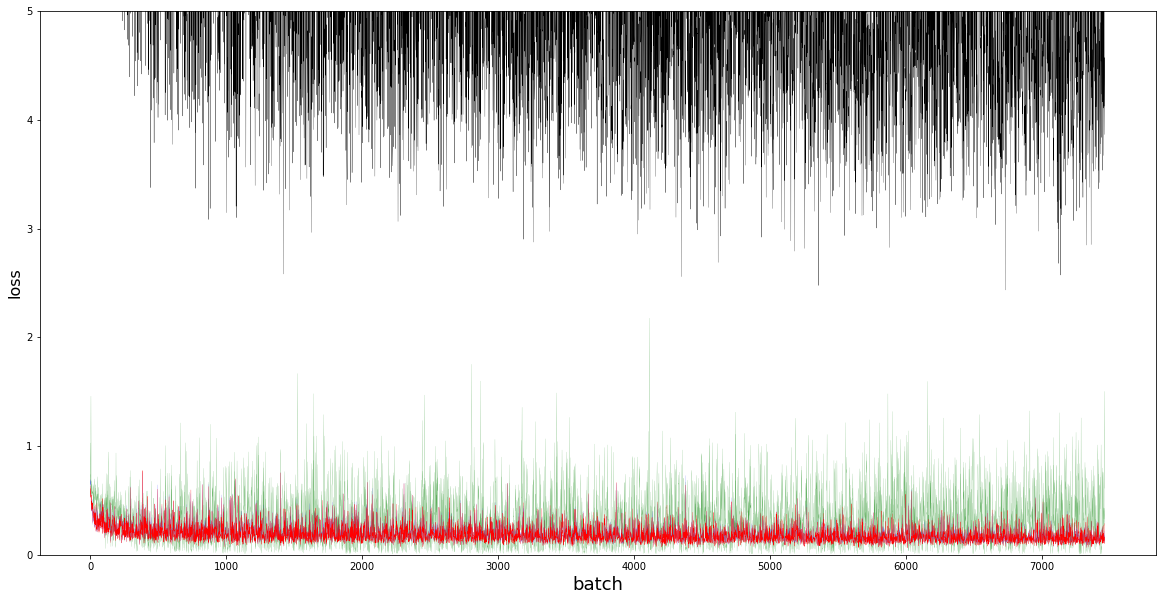

In [12]:
fig = plt.figure(figsize=(20,10))

plt.plot([x[1] for x in gan.g_losses], color='green', linewidth=0.1) #DISCRIM LOSS
# plt.plot([x[2] for x in gan.g_losses], color='orange', linewidth=0.1)
plt.plot([x[3] for x in gan.g_losses], color='blue', linewidth=0.1) #CYCLE LOSS
# plt.plot([x[4] for x in gan.g_losses], color='orange', linewidth=0.25)
plt.plot([x[5] for x in gan.g_losses], color='red', linewidth=0.25) #ID LOSS
# plt.plot([x[6] for x in gan.g_losses], color='orange', linewidth=0.25)

plt.plot([x[0] for x in gan.g_losses], color='black', linewidth=0.25)

# plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.ylim(0, 5)

plt.show()